In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import sys
import importlib
from scipy.optimize import curve_fit
from itertools import chain
from datetime import date

from uslib import fit_functions as ff
from uslib import load_data as ld

import matplotlib.animation as animation

In [8]:
# data_dir = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-03-01"#r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-29"#r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-22"

# data_dir1= r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-29"

# data_dir2 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-02-22"

# data_dir3 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-03-20" #First data entry having separate file for laser measurement

# data_dir4 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-03-21"

# data_dir5 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Measurements_2024-03-26"

# data_dir6 = r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_Measurements_2024-05-14"

# data_dir7 =r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_Measurements_2024-05-16"



data_dir=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1µW_FBMeasurements_2024-05-27"

data_dir1=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_10µW_FBMeasurements_2024-05-27"

data_dir2=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_50µW_FBMeasurements_2024-05-27"

data_dir3=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_100µW_FBMeasurements_2024-05-27"

data_dir4=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_200µW_FBMeasurements_2024-05-27"

data_dir5=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_500µW_FBMeasurements_2024-05-27"

data_dir6=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_750µW_FBMeasurements_2024-05-27"

data_dir7=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1mW_FBMeasurements_2024-05-27"

data_dir8=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5mW_FBMeasurements_2024-05-27"

data_dir9=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1µW_FBMeasurements_2024-05-29"

data_dir10=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5µW_FBMeasurements_2024-05-29"

data_dir11=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_2µW_FBMeasurements_2024-05-29"

data_dir12=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3µW_FBMeasurements_2024-05-29"

data_dir13=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4µW_FBMeasurements_2024-05-29"

data_dir14=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_6µW_FBMeasurements_2024-05-29"

data_dir15=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_8µW_FBMeasurements_2024-05-29"

data_dir16=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_10µW_FBMeasurements_2024-05-29"

data_dir17=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_16µW_FBMeasurements_2024-05-29"

data_dir18=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_20µW_FBMeasurements_2024-05-29"

data_dir19=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_30µW_FBMeasurements_2024-05-29"

data_dir20=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_32µW_FBMeasurements_2024-05-29"

data_dir21=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_40µW_FBMeasurements_2024-05-29"

data_dir22=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_64µW_FBMeasurements_2024-05-29"

data_dir23=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_128µW_FBMeasurements_2024-05-29"

data_dir24=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5mW_FBMeasurements_2024-05-29"

data_dir25=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_8µW_FBMeasurements_2024-05-31"

data_dir26=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_16µW_FBMeasurements_2024-05-31"

data_dir27=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_30µW_FBMeasurements_2024-05-31"

data_dir28=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_32µW_FBMeasurements_2024-05-31"

data_dir29=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_50µW_FBMeasurements_2024-05-31"


data_dir30=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_0.0V_1518nmMeasurements_2024-06-05"

data_dir31=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_0.3V_1518nmMeasurements_2024-06-05"

data_dir32=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_0.6V_1518nmMeasurements_2024-06-05"

data_dir33=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_0.9V_1518nmMeasurements_2024-06-05"

data_dir34=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.2V_1518nmMeasurements_2024-06-05"

data_dir35=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5V_1518nmMeasurements_2024-06-05"

data_dir36=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.8V_1518nmMeasurements_2024-06-05"

data_dir37=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_2.1V_1518nmMeasurements_2024-06-05"

data_dir38=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_2.4V_1518nmMeasurements_2024-06-05"

data_dir39=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_2.7V_1518nmMeasurements_2024-06-05"

data_dir40=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.0V_1518nmMeasurements_2024-06-05"

data_dir41=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.1V_1518nmMeasurements_2024-06-05"

data_dir42=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.2V_1518nmMeasurements_2024-06-05"

data_dir43=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.3V_1518nmMeasurements_2024-06-05"

data_dir44=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.4V_1518nmMeasurements_2024-06-05"

data_dir45=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.4V_1518nmMeasurements_2024-06-05"

data_dir46=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.5V_1518nmMeasurements_2024-06-05"

data_dir47=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.6V_1518nmMeasurements_2024-06-05"

data_dir48=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.7V_1518nmMeasurements_2024-06-05"

data_dir49=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.8V_1518nmMeasurements_2024-06-05"

data_dir50=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3.9V_1518nmMeasurements_2024-06-05"

data_dir51=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.0V_1518nmMeasurements_2024-06-05"

data_dir52=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.1V_1518nmMeasurements_2024-06-05"

data_dir53=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.2V_1518nmMeasurements_2024-06-05"

data_dir54=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.3V_1518nmMeasurements_2024-06-05"

data_dir55=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.4V_1518nmMeasurements_2024-06-05"

data_dir56=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.5V_1518nmMeasurements_2024-06-05"

data_dir57=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.6V_1518nmMeasurements_2024-06-05"

data_dir58=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.7V_1518nmMeasurements_2024-06-05"

data_dir59=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.8V_1518nmMeasurements_2024-06-05"

data_dir60=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4.9V_1518nmMeasurements_2024-06-05"

data_dir61=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_5.0V_1518nmMeasurements_2024-06-05"



data_dirs = [data_dir,data_dir1,data_dir2, data_dir3, data_dir4, data_dir5, data_dir6, data_dir7, data_dir8, data_dir9, data_dir10, data_dir11, data_dir12, data_dir13, data_dir14, data_dir15, data_dir16, data_dir17, data_dir18, data_dir19, data_dir20, data_dir21, data_dir22, data_dir23, data_dir24, data_dir25, data_dir26, data_dir27, data_dir28, data_dir29, data_dir30, data_dir31, data_dir32, data_dir33, data_dir34, data_dir35, data_dir36, data_dir37, data_dir38, data_dir39, data_dir40, data_dir41, data_dir42, data_dir43, data_dir44, data_dir45, data_dir46, data_dir47, data_dir48, data_dir49, data_dir50, data_dir51, data_dir52, data_dir53, data_dir54, data_dir55, data_dir56, data_dir57, data_dir58, data_dir59,data_dir60, data_dir61]
datasets_no = len(data_dirs)# len(data_dirs)

#path_coherent = r"C:\Users\au622616\OneDrive - Aarhus universitet\U shaped measurements\ESA_spectrum_Feedback measurement.txt"
dirs= []

for i in range(datasets_no):

    dirs.append(ld.get_lab_session_data(data_dirs[i]))

#ld.get_all_data()

In [9]:
measurements = [[[]for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]

laser_powers = [[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]
laser_lists = [[[]for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]
las_var = [[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]

feedback_powers = [[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]
fb_var = [[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]
feedback_lists = [[[]for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]



list_of_dicts = [[{} for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]


start_times =[[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]


for data_index in range(datasets_no):
    #fig, ax = plt.subplots()
    #artists = []

    #if data_index < 3:
    for i, directory in enumerate(dirs[data_index][1]): #Close spectrum is index 1
        
        if directory == None:
            pass
        else:
            fs = directory.freqs #Obtaining ESA close spectrum frequencies
            ps = directory.powers #Obtaining ESA close spectrum powers

            plot = False
        
            #fs, ps = dp.get_close_spectrum_from_folder(directory,plot=plot,center_about_carrier=True)

            measurements[data_index][i] = fs, ps

            list_of_dicts[data_index][i] = directory.params



            try:
                if dirs[data_index][3].las_avg[i] != None: #If there is a separate laser file

                    laser_powers[data_index][i] = dirs[data_index][3].las_avg[i]
                    las_var[data_index][i] = dirs[data_index][3].las_var[i]
                    laser_lists[data_index][i] =  dirs[data_index][3].laser_powers[i]


                else:
                
                    laser_powers[data_index][i] = list_of_dicts[data_index][i]['Laser power']
                    las_var[data_index][i] = None
            except AttributeError:
                
                pow_time_dict = dirs[data_index][3][i]

                laser_lists[data_index][i] = pow_time_dict['laser_power']

                laser_powers[data_index][i] = np.average(pow_time_dict['laser_power'])

                las_var[data_index][i] = np.var(pow_time_dict['laser_power'])


            try:    
                if dirs[data_index][3].fb_avg[i] != None: #If there is a separate laser file

                    feedback_powers[data_index][i] = dirs[data_index][3].fb_avg[i] #Saves the average power pr measurement
                    fb_var[data_index][i] = dirs[data_index][3].fb_var[i]
                    feedback_lists[data_index][i] =  dirs[data_index][3].fb_powers[i]


                else:

                    feedback_powers[data_index][i] = list_of_dicts[data_index][i]['Feedback power']
                    fb_var[data_index][i] = None
            except AttributeError:
                
                pow_time_dict = dirs[data_index][3][i]

                feedback_lists[data_index][i] = pow_time_dict['feedback_power']

                feedback_powers[data_index][i] = np.average(pow_time_dict['feedback_power'])

                fb_var[data_index][i] = np.var(pow_time_dict['feedback_power'])

            
            if plot:
                    
                plt.figure()
                plt.plot(fs,ps)
                plt.xlim([-0.6,0.6])
                plt.ylim([-120,-40])
                plt.xlabel('Frequency detuning [MHz]')
                plt.ylabel('Spectrum power [dBc]')
                plt.title(f'Plot number {i}')

            try:
                start_times[data_index][i] = dirs[data_index][3][i]['start_time']

            except:
                pass


feedback_ratios = [[[]for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]

for data_index in range(datasets_no):

    max_laser_power = max([value for value in laser_powers[data_index] if value is not None])

    for i in range(len(dirs[data_index][1])):
            
            laser_power = laser_powers[data_index][i]
            feedback_power = feedback_powers[data_index][i]

            if laser_power is not None:

                feedback_ratios[data_index][i] = ld.feedback_ratio(laser_power,feedback_power,max_laser_power)


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
no_of_pow_reads = [0 for _ in range(3,datasets_no)]

for data_index in range(3,datasets_no):
    for liste in laser_lists[data_index]:
        no_of_pow_reads[data_index-3] += len(liste)

    no_of_pow_reads[data_index-3] /= len(laser_lists[data_index])
    

In [ ]:
'''with open(ld.get_all_data(data_dirs[3])[0]) as laser_file:

    laser_variances = laser_file.readlines()

    for i,directory in enumerate(dirs[data_index]):    
        las_avg = np.average(eval(laser_variances[i+1]))
        laser_powers[data_index][i] = las_avg     
        #feedback_powers[data_index][i] = list_of_dicts[data_index][i]['Feedback power']  '''

"with open(ld.get_all_data(data_dirs[3])[0]) as laser_file:\n\n    laser_variances = laser_file.readlines()\n\n    for i,directory in enumerate(dirs[data_index]):    \n        las_avg = np.average(eval(laser_variances[i+1]))\n        laser_powers[data_index][i] = las_avg     \n        #feedback_powers[data_index][i] = list_of_dicts[data_index][i]['Feedback power']  "

In [ ]:
if True:
    pass
else: 
    # range_of_incoherent =  [list(range(0,1)) + list(range(10,11)) + list(range(12,13))]# + list(range(63,66))
    # range_of_incoherent.append(list(range(0,5)) + list(range(7,8))+ list(range(40,42)) + list(range(63,67)))
    # range_of_incoherent.append(list(range(0,20))+ list(range(36,38)) + list(range(41,43)))
    # range_of_incoherent.append(list(range(24)) + list(range(25,26)) + list(range(32,33)) + list(range(35,36)) + list(range(37,66)) + list(range(88,90)) + list(range(94,95)) + list(range(96,97)) + list(range(98,99)))
    # range_of_incoherent.append(list(range(13)) + list(range(19,34)) + list(range(43,49)))
    # range_of_incoherent.append( list(range(9)) + list(range(18,34)) )
    # range_of_incoherent.append( list(range(9)) + list(range(9,102)) )
    # range_of_incoherent.append( list(range(9)) + list(range(9,102)) )

    linewidths =[[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]
    #linewidth_lor = [[] for _ in range(3)]


    for data_index in range(datasets_no):
        #for number, i in enumerate(range_of_incoherent[data_index]):

        for i in range(len(dirs[data_index][1])):
                
                if dirs[data_index][1][i] ==None:
                    pass
                else:
                    fs = measurements[data_index][i][0]
                    ps = measurements[data_index][i][1] - max(measurements[data_index][i][1])
                    #fs, ps = dp.get_close_spectrum_from_folder(dirs[i],plot=False,center_about_carrier=True)



                    filter_close = abs(fs) < 0.075
                    filter_far = (abs(fs) > 0.3) & (abs(fs) < 0.6)

                    
                    params_gauss, whatevs = curve_fit(ff.gauss_log,fs[filter_close]*10**6,ps[filter_close])

                    #params_lor, whatevs = curve_fit(ff.lor_log,fs[filter_far]*10**6,ps[filter_far])




                    #feedback_ratio = feedback_ratio_EOM_on(dirs[i])
                    laser_power = laser_powers[data_index][i]
                    feedback_power = feedback_powers[data_index][i]

                    feedback_ratio = feedback_ratios[data_index][i]
                    
                    linewidths[data_index][i] = (abs(params_gauss[0])*2*np.sqrt(2*np.log(2))*np.sqrt(10/np.log(10))/np.sqrt(2)) #Divided by sqrt(2) to get linewidth from FWHM
                    #linewidth_lor.append(abs(params_lor[1])) #Divided by two to get linewidth from FWHM


                    #linewidths.append(params[0])

                    filter_gauss_plot = abs(fs) < 0.6

                    plt.figure()
                    plt.plot(fs,ps, label = 'Data, background subtracted')
                    plt.plot(fs[filter_gauss_plot],ff.gauss_log(fs[filter_gauss_plot]*10**6,params_gauss[0],params_gauss[1]),label='gauss function')
                    #plt.plot(fs,ff.lor_log(fs*10**6,params_lor[0],params_lor[1]),label='Lorentzian function')
                    plt.title(f'index {data_index} no. {i}, feedback: {feedback_ratio:.2f} dB')



                    #plt.title(f'Linewidth: {params[0]*1e-3:.1f} kHz, feedback ratio: {feedback_ratio} dB, Laser power: {laser_power*1e6:.1f} µW')
                    plt.legend()

                    plt.xlim([-0.6,.6])
                    plt.ylim([-80,0])


In [ ]:
# range_of_zeta = [list(range(1,10)) + list(range(11,12)) + list(range(13,29))] # + list(range(66,69))
# range_of_zeta.append(list(range(5,7)) + list(range(8,40)) + list(range(42,63)) + list(range(67,70))) # + list(range(66,69))
# range_of_zeta.append(list(range(20,36)) + list(range(38,41)))
# range_of_zeta.append(list(range(24,25)) + list(range(26,32)) + list(range(33,35)) + list(range(36,37)) + list(range(66,88)) + list(range(90,94)) + list(range(95,96)) + list(range(97,98)) + list(range(99,102)))
# range_of_zeta.append(list(range(13,19)) + list(range(34,43)) + list(range(49,52)))
# range_of_zeta.append( list(range(9,18)) + list(range(34,52)) )
# range_of_zeta.append( list(range(72)) + list(range(73,102)) )
# range_of_zeta.append( list(range(9))) 


#list_of_dicts_zeta = [[{} for _ in range(len(range_of_zeta[i]))] for i in range(3)]
#linewidth_zeta= [[] for _ in range(3)]
#feedback_ratios_zeta = [[] for _ in range(3)]
#laser_powers_zeta = [[] for _ in range(3)]
#feedback_powers_zeta = [[] for _ in range(3)]

linewidths =[[None for _ in range(len(dirs[i][1]))] for i in range(datasets_no)]



for data_index in range(datasets_no):
    #for number, i in enumerate(range_of_zeta[data_index]):
    
    for i in range(len(dirs[data_index][1])):
            
        if dirs[data_index][1][i] ==None:
            pass
        else:
            
            #fs, ps = dp.get_close_spectrum_from_folder(dirs[i],plot=False,center_about_carrier=True)

            fs = measurements[data_index][i][0]
            ps = measurements[data_index][i][1] - max(measurements[data_index][i][1])

            if data_index == 0 or data_index ==9:
                filter = (abs(fs) > 0.2) & (abs(fs) < 0.7)
            else:
                filter = (abs(fs) > 0.2) & (abs(fs) < 0.4)



            params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[3*10**3,25,3140])



            linewidths[data_index][i] = params[0]
            #linewidth_lor.append(params[0])


            laser_power = laser_powers[data_index][i]
            feedback_power = feedback_powers[data_index][i]

            feedback_ratio = feedback_ratios[data_index][i]

            filter_zeta_plot = abs(fs) < 0.6


            # plt.figure()
            # plt.plot(fs,ps, label = 'Data, background subtracted')
            # plt.plot(fs[filter_zeta_plot],ff.zeta_fit(fs[filter_zeta_plot]*10**6,params[0],params[1],params[2]), label = 'zeta function')
            # plt.title(f'{data_dirs[data_index][105:-23]}, {data_dirs[data_index][-10:]}  no. {i}, Linewidth: {params[0]*1e-3:.1f} kHz, feedback ratio: {feedback_ratio:.2f} dB, Laser power: {laser_power*1e6:.1f} µW')
            # plt.legend()

            # plt.xlim([-0.8,0.8])
            # plt.ylim([-100,0])


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 16788.268510570648, offset: 37.39667491106798, delay length: 3159.7628632975952
Linewidth: 6279.905326828522, offset: 32.47606913451508, delay length: 3140.362437610111


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 913.8171137337557, offset: 21.403698681011743, delay length: 3136.1953682144626


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 318.5304620756276, offset: 24.829537748621878, delay length: 3136.044823701356


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 412.01544327456855, offset: 19.163727666224087, delay length: 3136.0256163837544


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 404.835606724325, offset: 19.087055829238807, delay length: 3135.84206631592


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 283.6002064848197, offset: 20.632872631540703, delay length: 3135.5707870683823


C:\Users\au617810\AppData\Local\Temp\ipykernel_12144\2624828039.py:80: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 341.4386992789833, offset: 21.29820103683811, delay length: 3135.4547264015782


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 225.60637845693003, offset: 26.82156774497656, delay length: 3134.153975634828
Linewidth: 16258.76920322275, offset: 38.28038249935584, delay length: 3158.403485429462
Linewidth: 13296.555971309444, offset: 38.20769149272577, delay length: 3148.939503200091
Linewidth: 10458.561137006012, offset: 36.793007747610815, delay length: 3136.404425109744
Linewidth: 6922.829784989691, offset: 34.801418045943144, delay length: 3136.8396248073664
Linewidth: 5641.444865498926, offset: 34.016368959347815, delay length: 3140.219247484757
Linewidth: 2544.155514855845, offset: 30.99184400805797, delay length: 3135.436959053213
Linewidth: 3716.6523787816136, offset: 31.052498864987342, delay length: 3138.36571288976
Linewidth: 1682.9850759559615, offset: 29.117298733500697, delay length: 3137.4372956918946
Linewidth: 2510.6510463753075, offset: 31.838131061352666, delay length: 3139.2249413589925


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 848.3207520202526, offset: 25.786339178922265, delay length: 3136.032298261769


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 662.6201872949928, offset: 25.5091714822925, delay length: 3136.2700982245797
Linewidth: 2309.295086433805, offset: 30.192444358786435, delay length: 3138.687853011678


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 438.5195687978057, offset: 24.972799384273777, delay length: 3136.0099757229714


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 475.7594921439958, offset: 25.992256578951913, delay length: 3135.656842267787


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 263.9962467693548, offset: 24.15095920091739, delay length: 3135.682077777519


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 273.2581231494374, offset: 22.067936543424352, delay length: 3134.8356138050162
Linewidth: 2412.955936359415, offset: 28.13333142668868, delay length: 3135.845527706284
Linewidth: 1184.8737503970283, offset: 26.55980786746265, delay length: 3135.7781871506154


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 643.6378594491748, offset: 27.053781195544794, delay length: 3136.8467873895656


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 863.0412161617149, offset: 26.864796192538627, delay length: 3137.746636525384


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 462.1631294335947, offset: 25.452583151262356, delay length: 3136.5116267098515


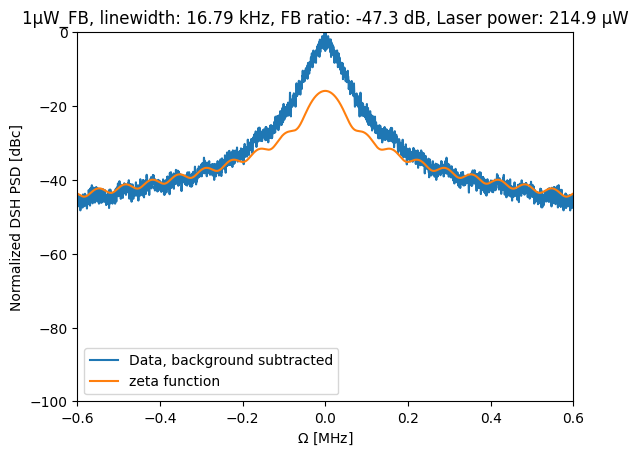

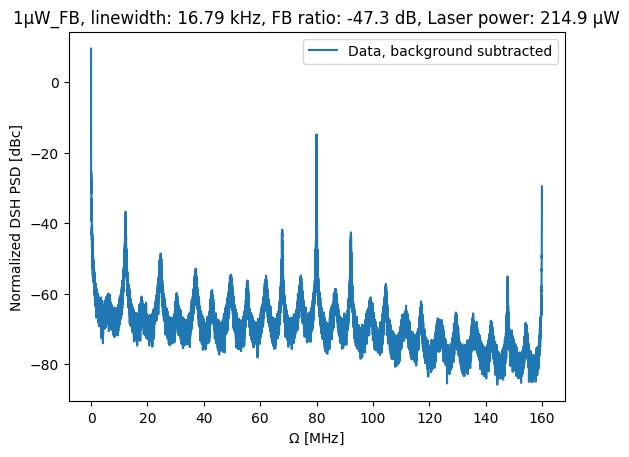

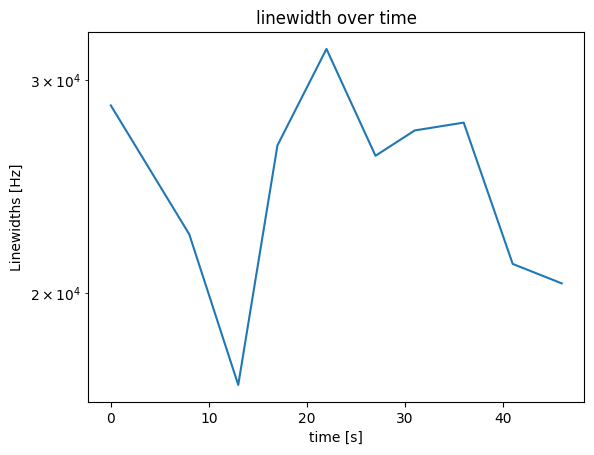

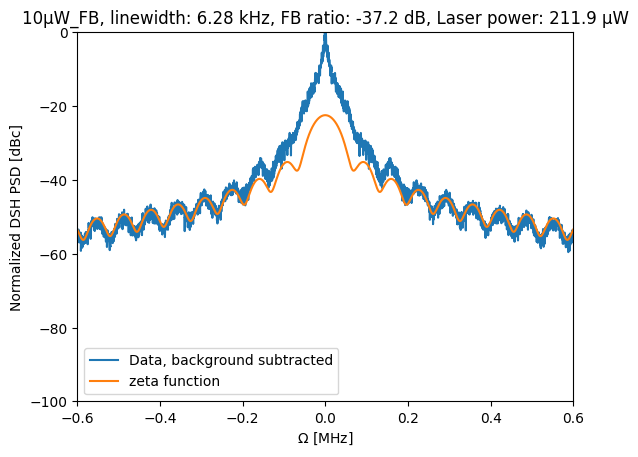

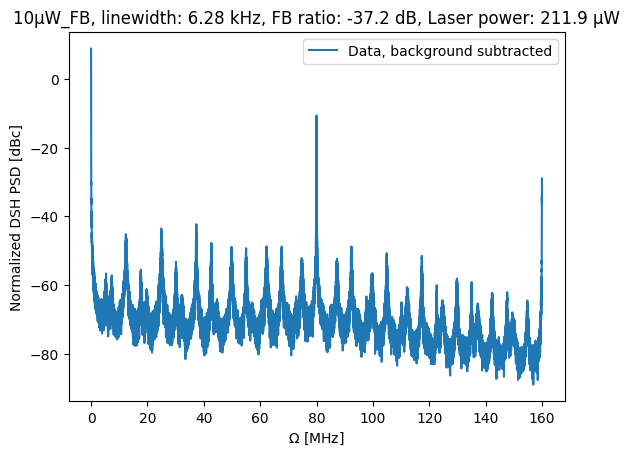

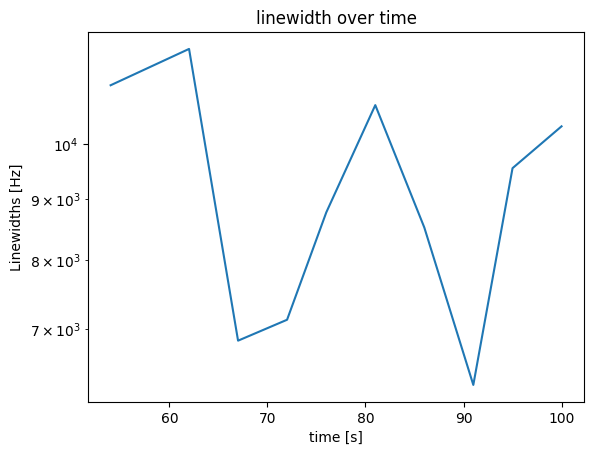

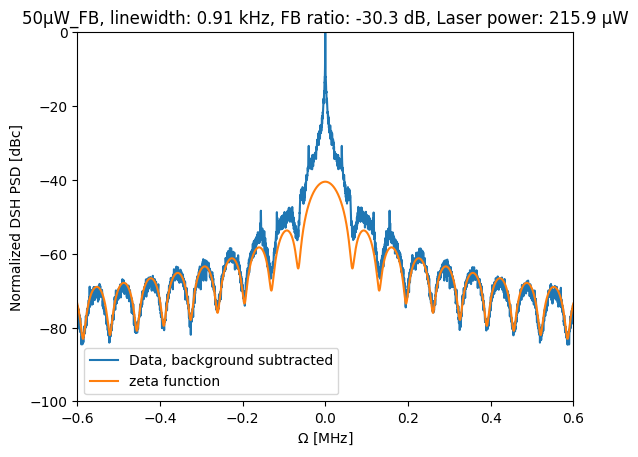

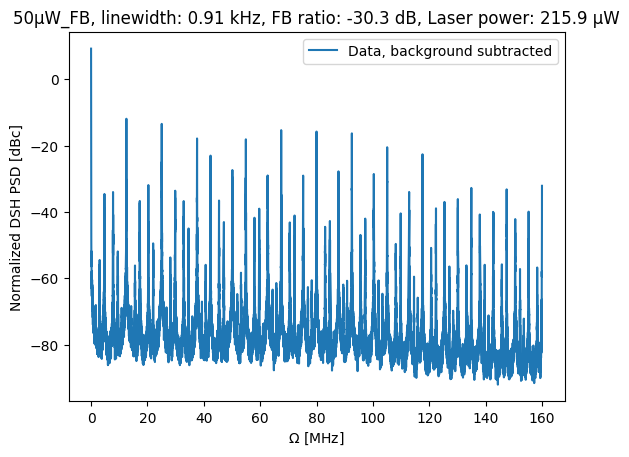

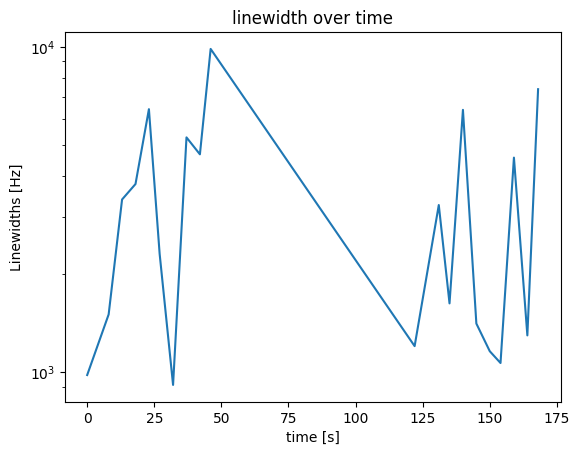

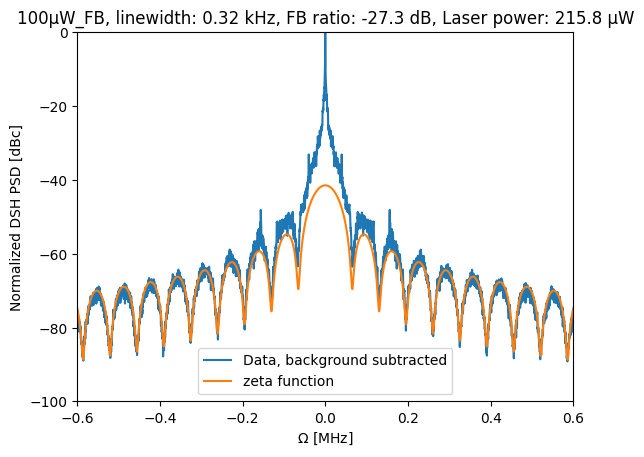

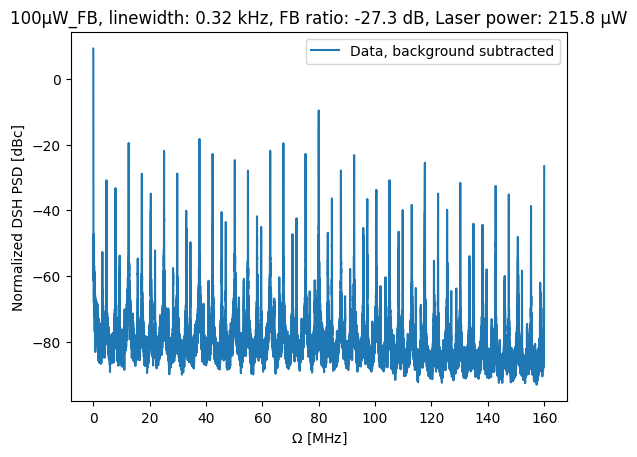

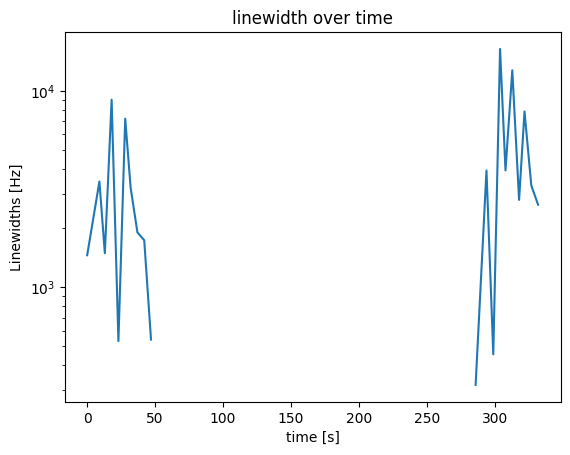

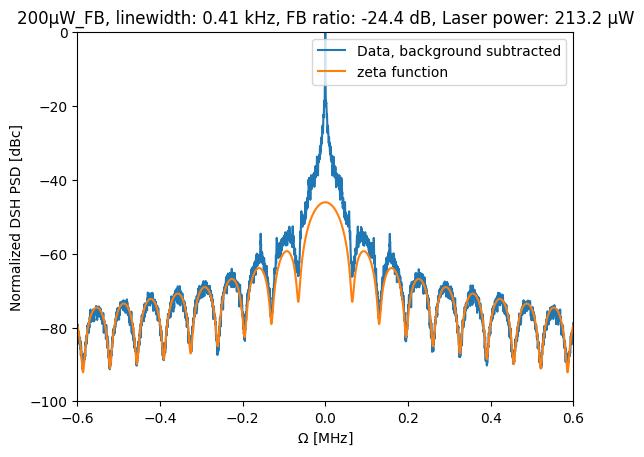

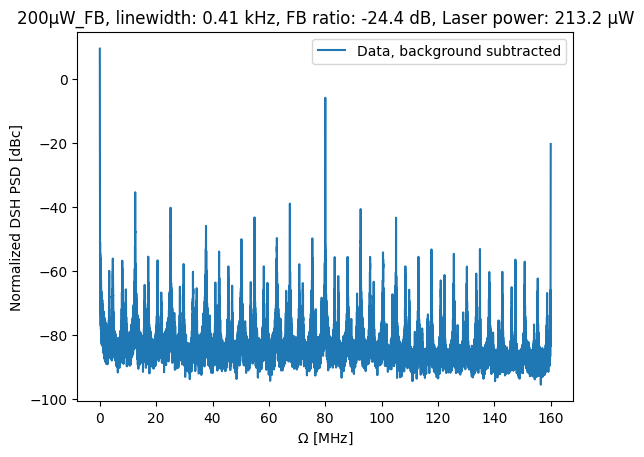

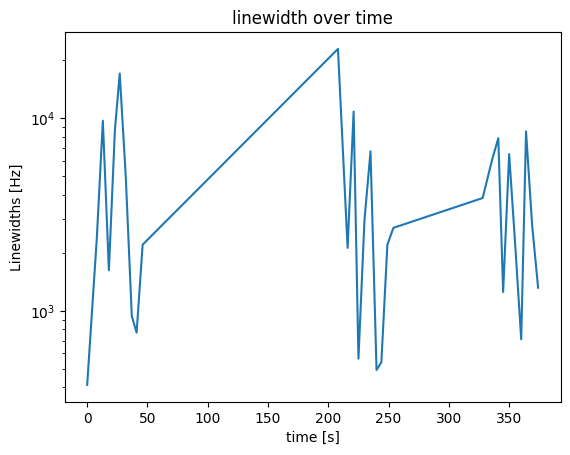

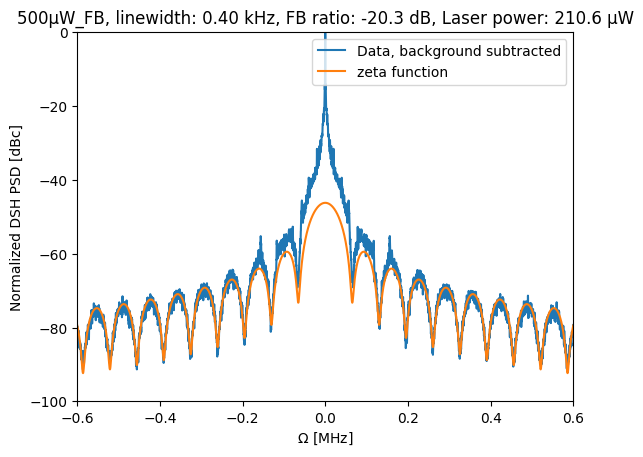

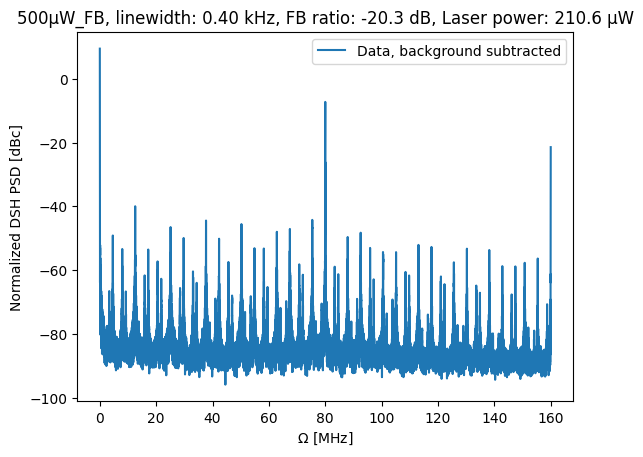

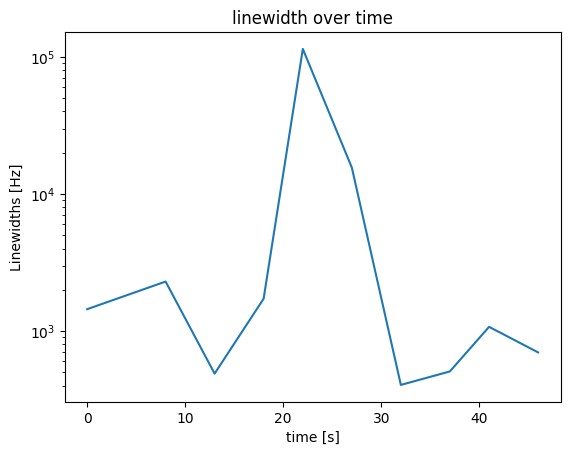

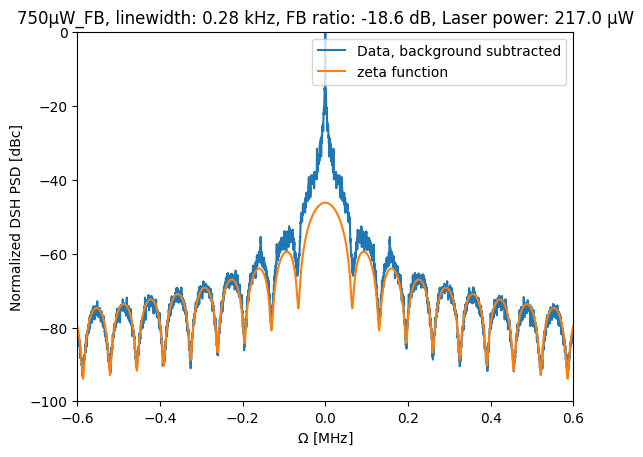

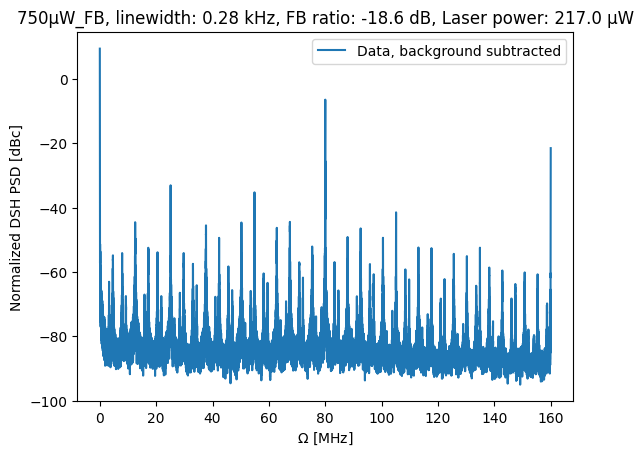

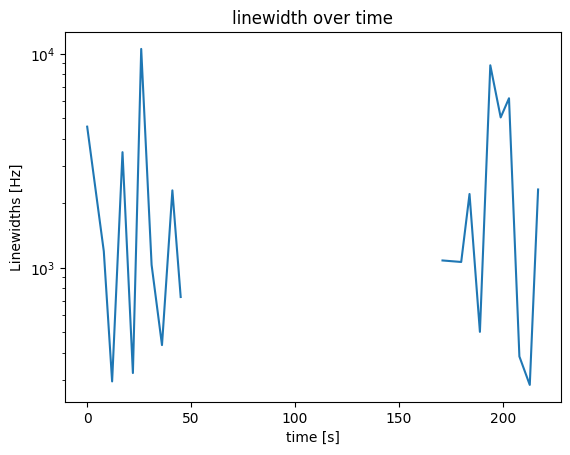

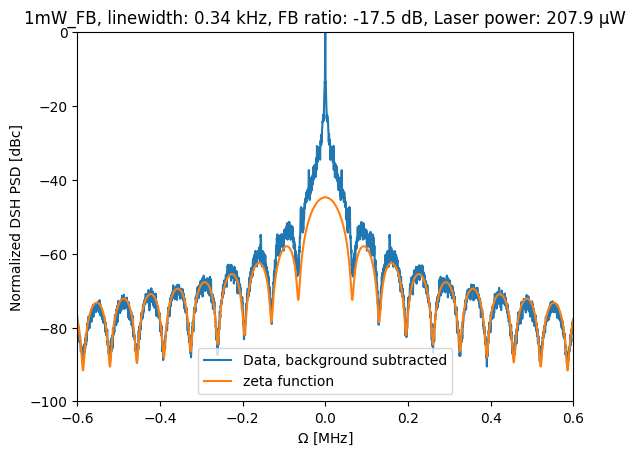

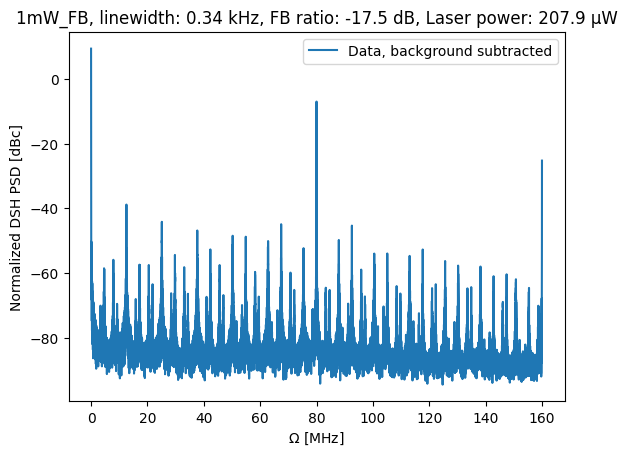

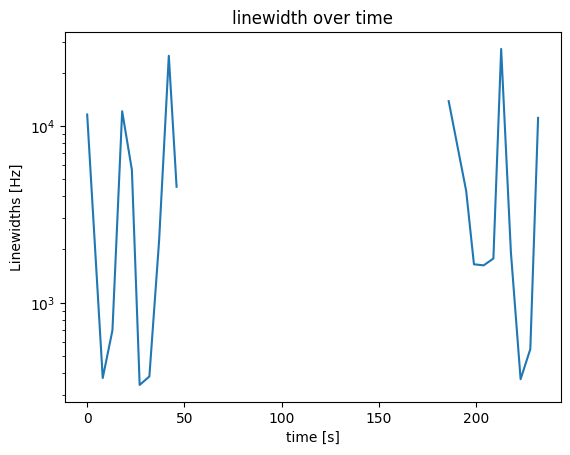

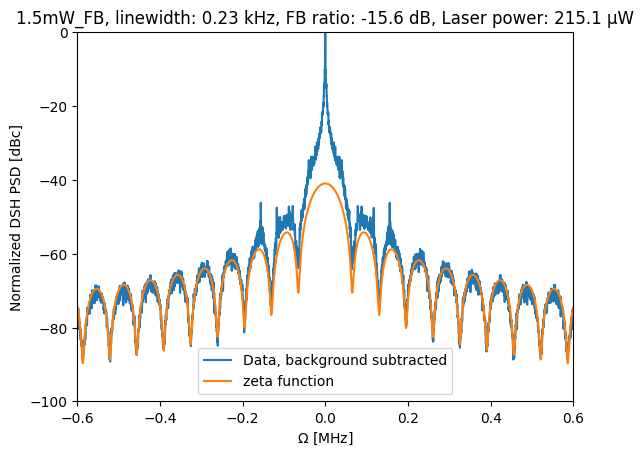

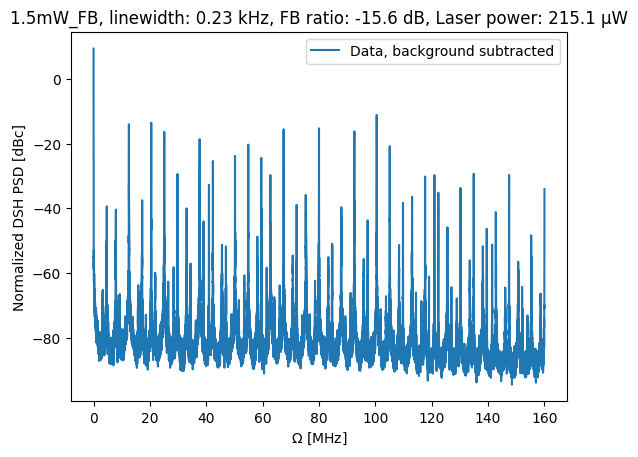

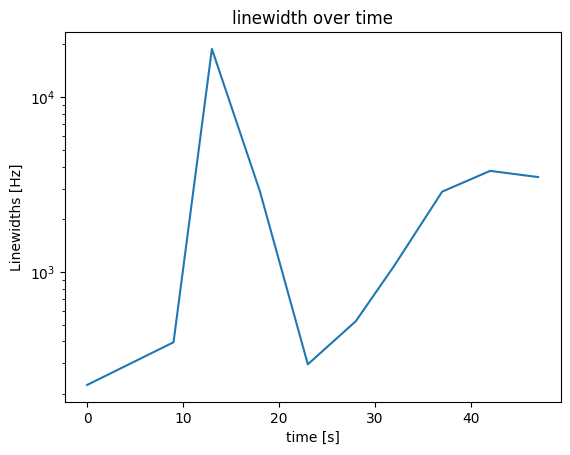

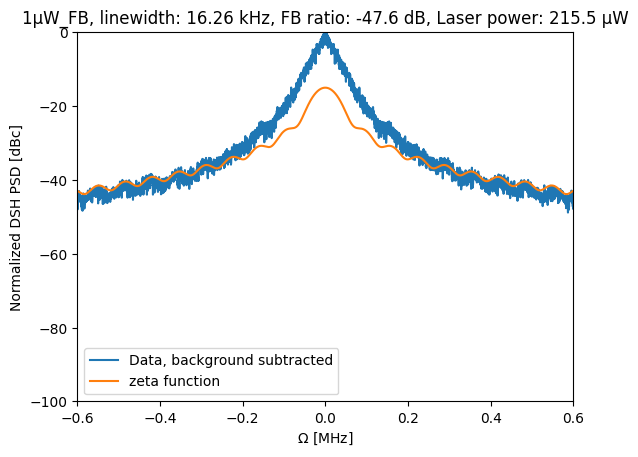

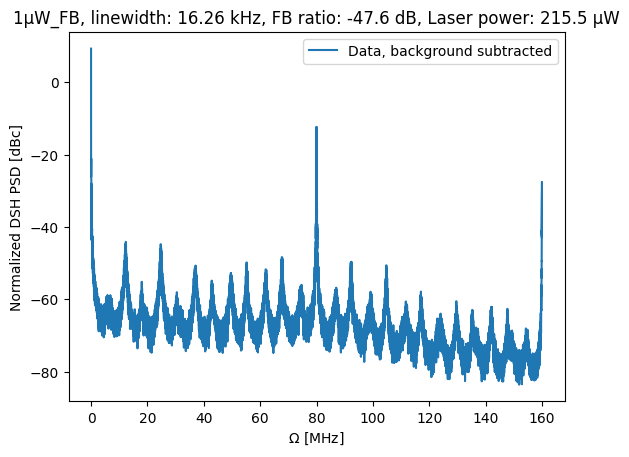

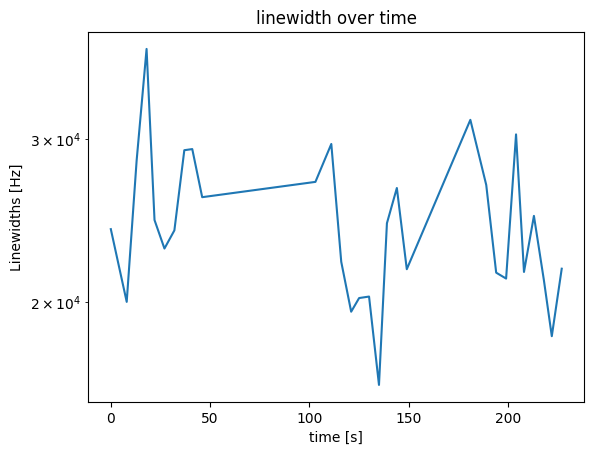

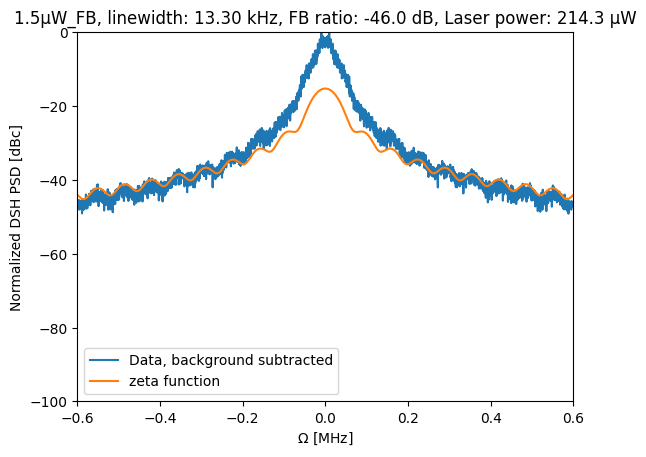

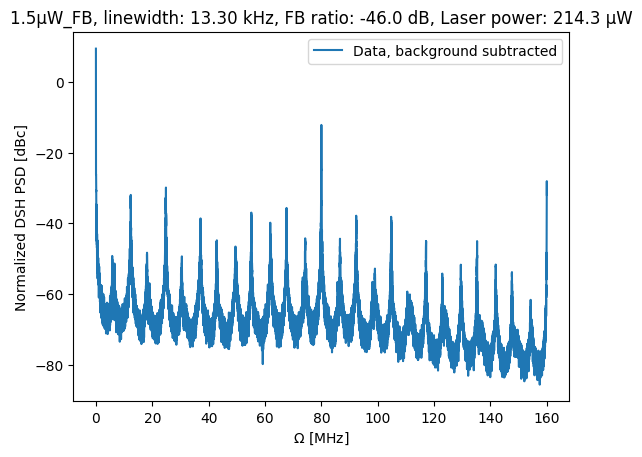

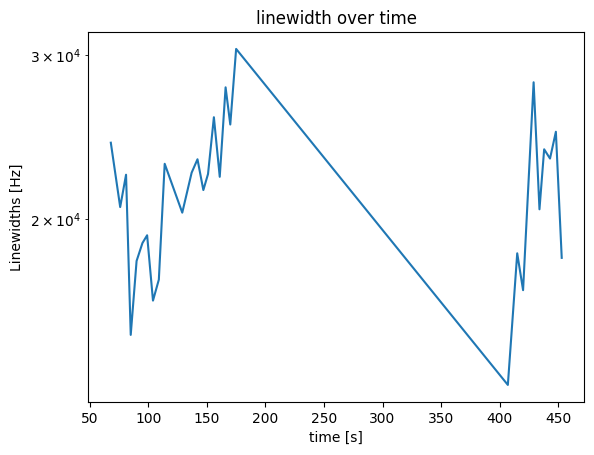

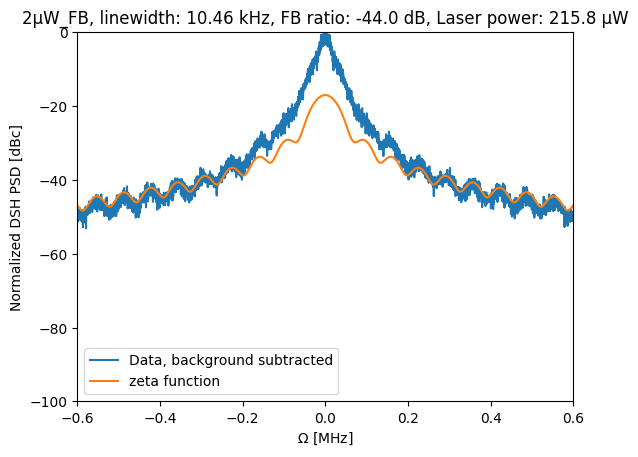

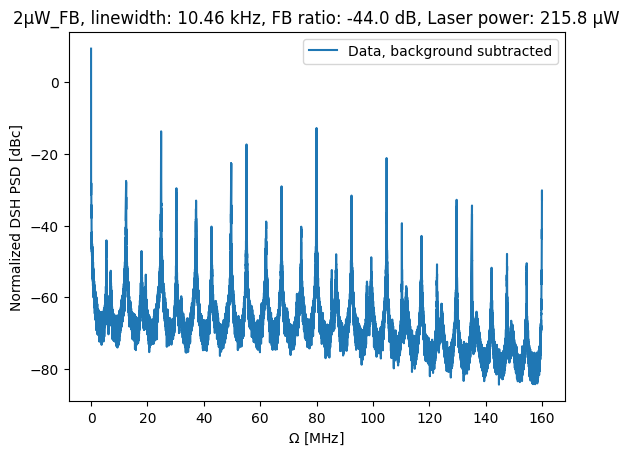

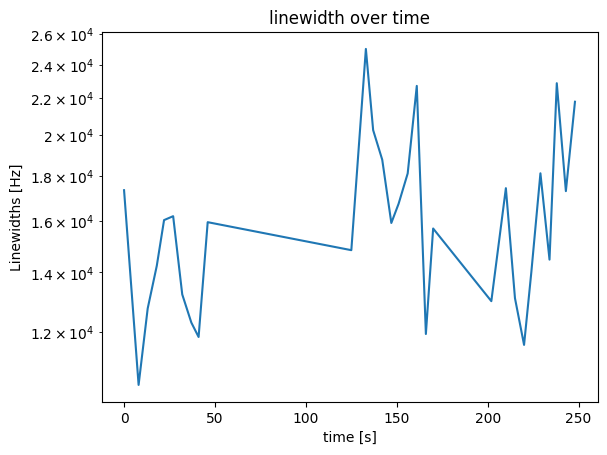

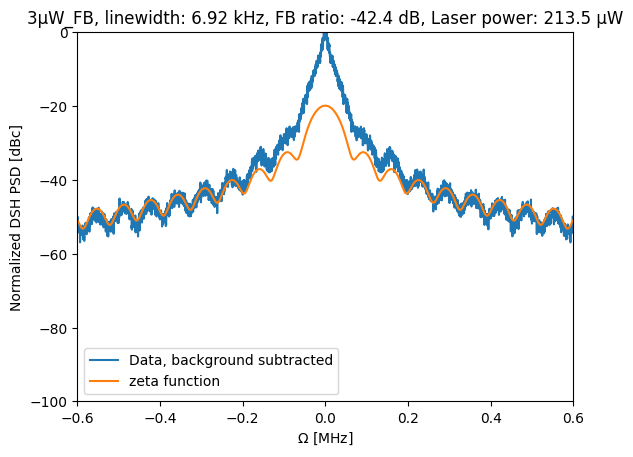

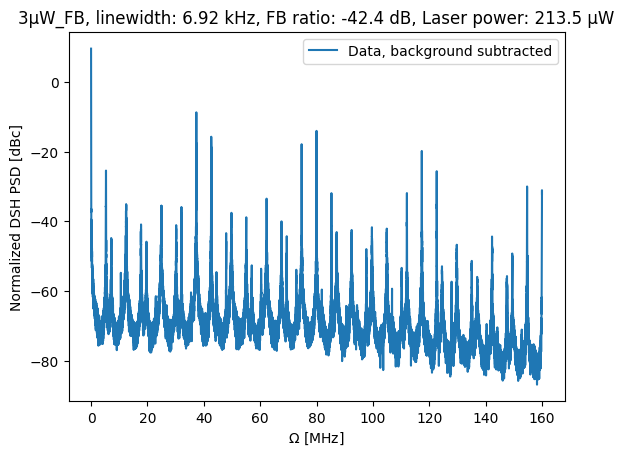

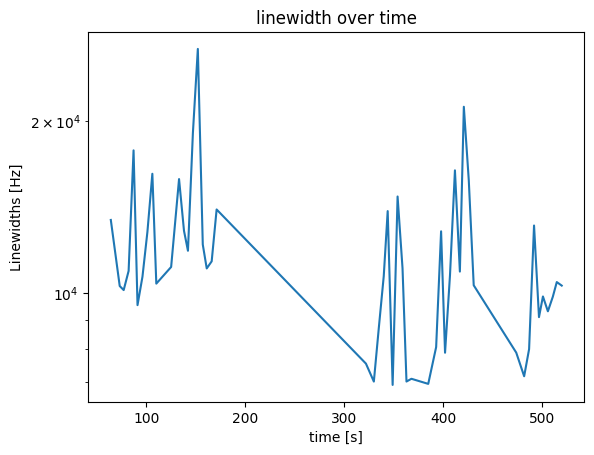

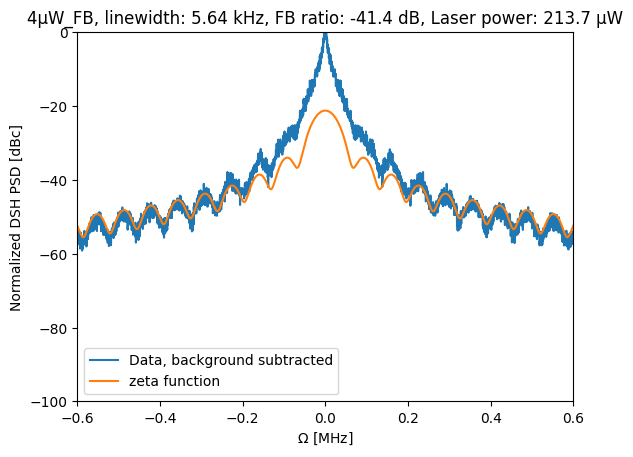

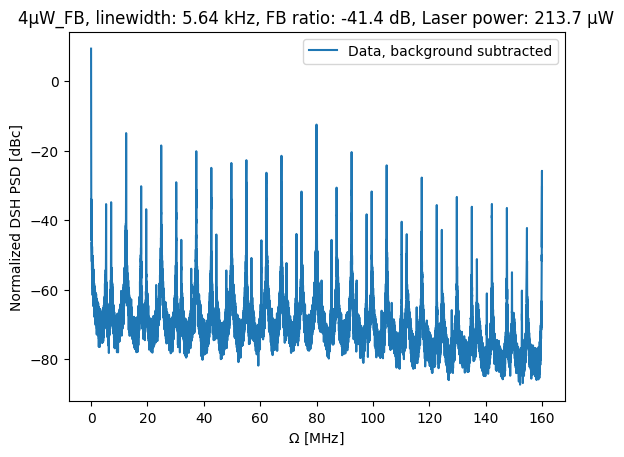

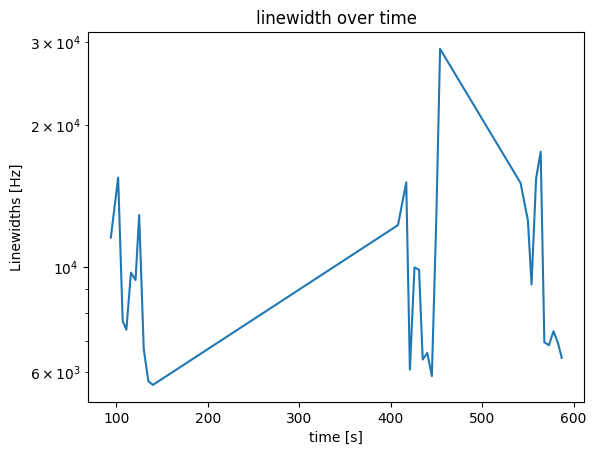

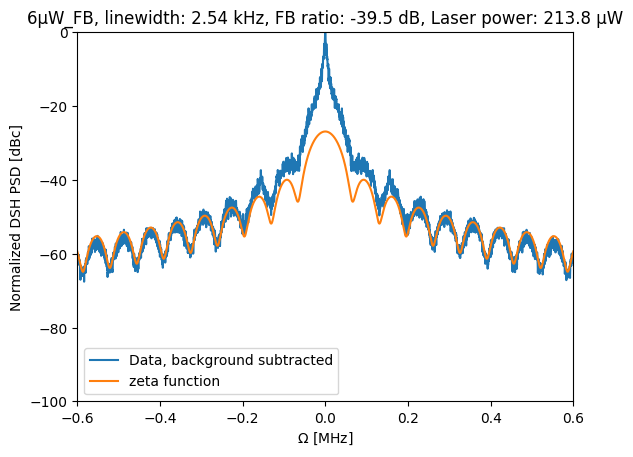

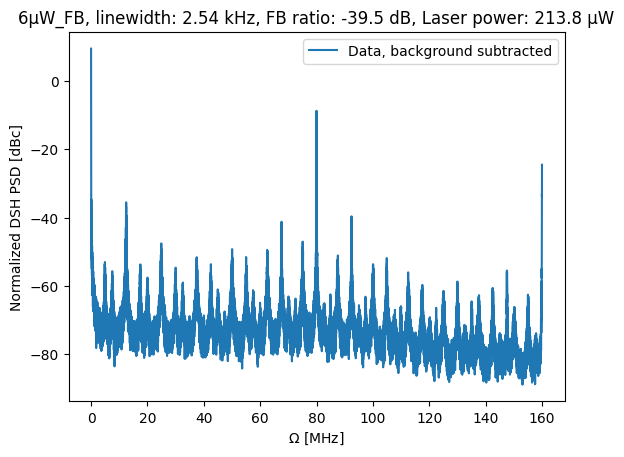

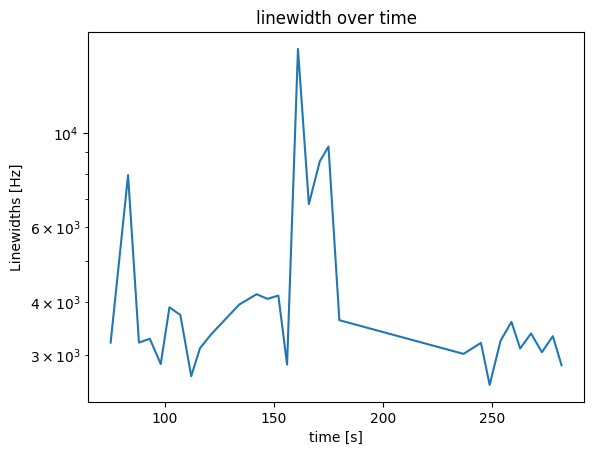

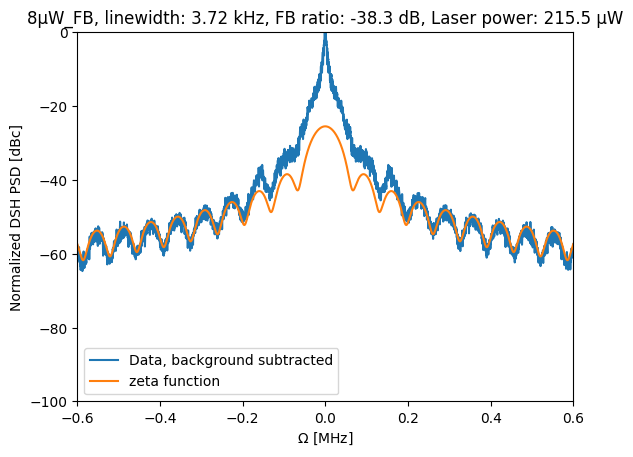

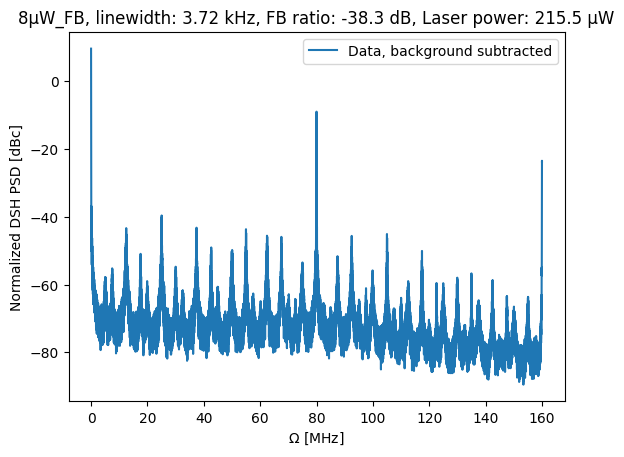

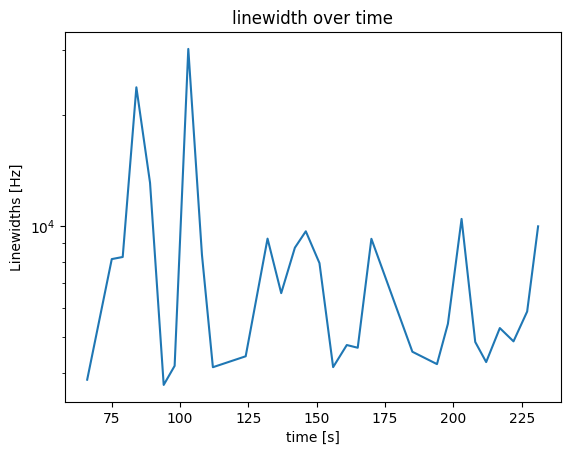

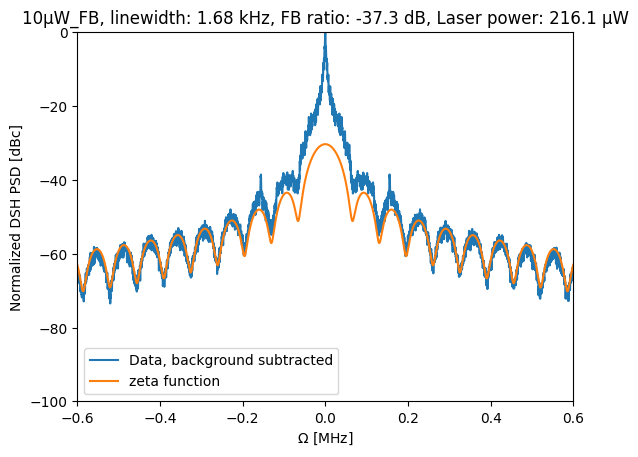

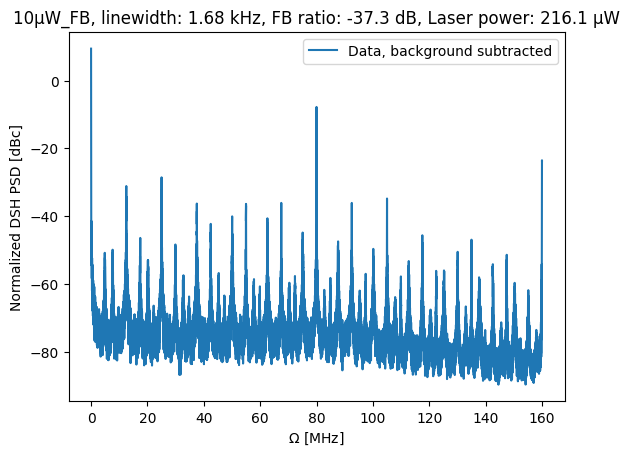

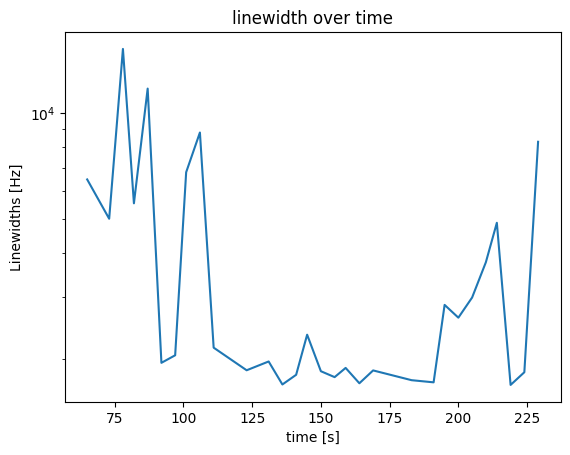

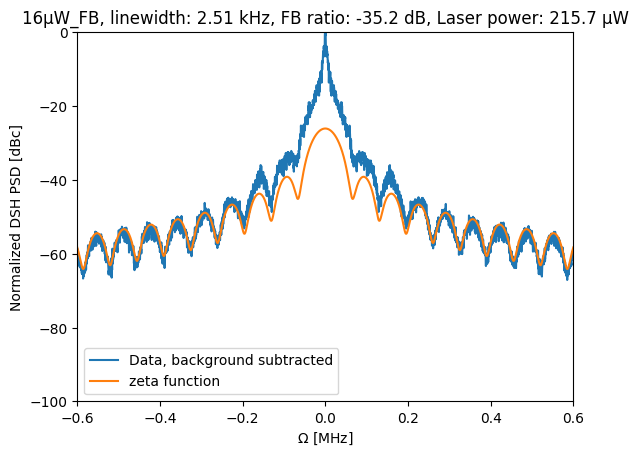

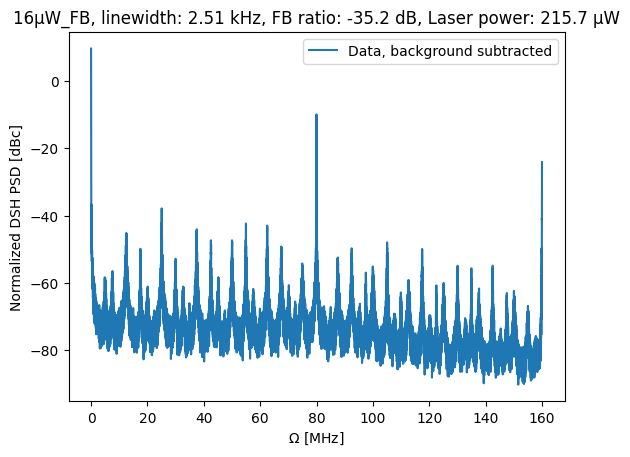

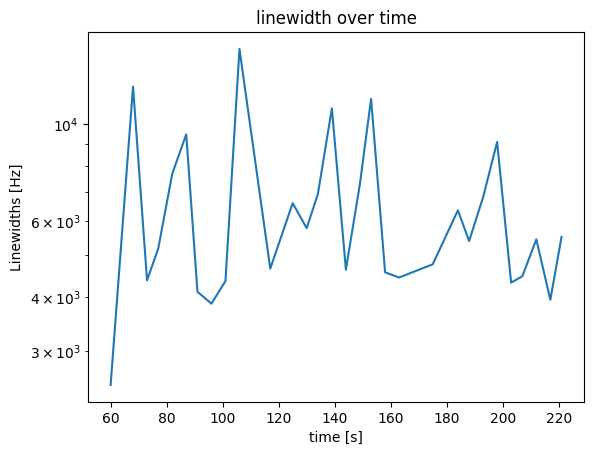

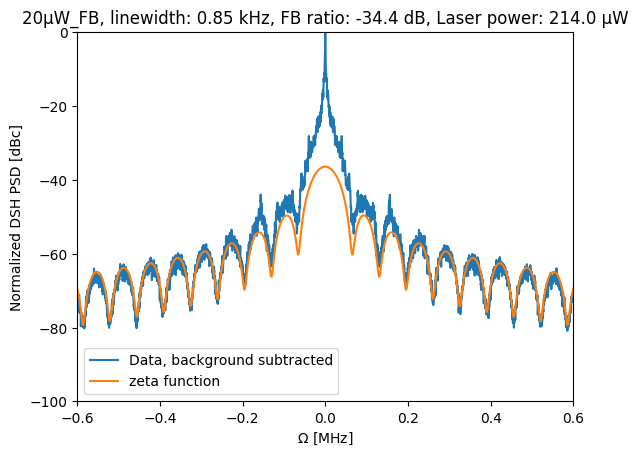

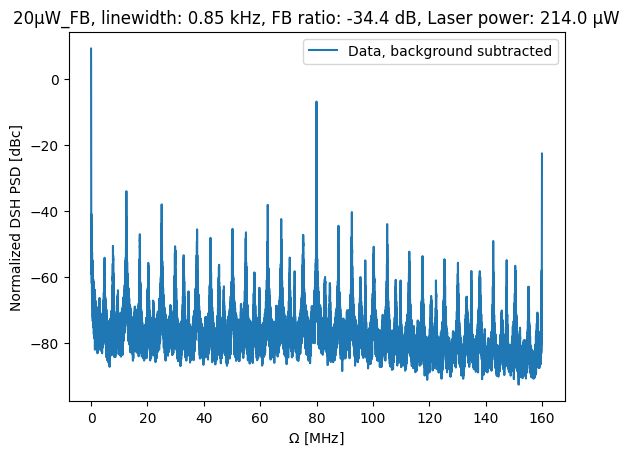

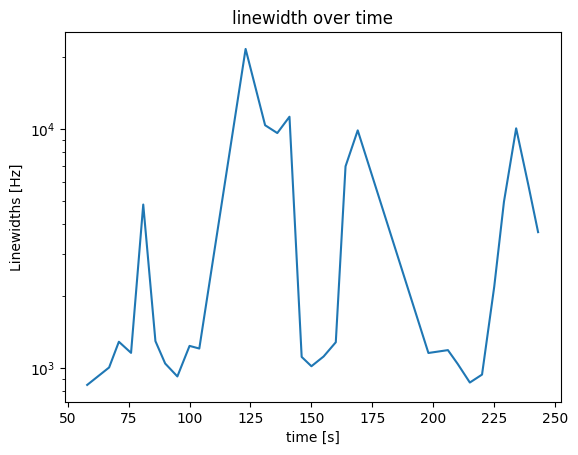

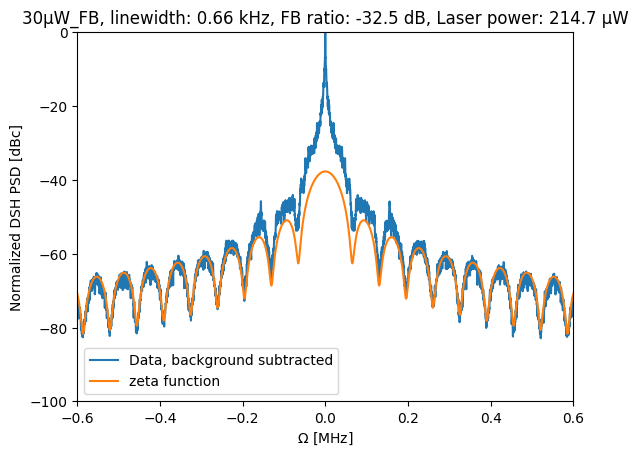

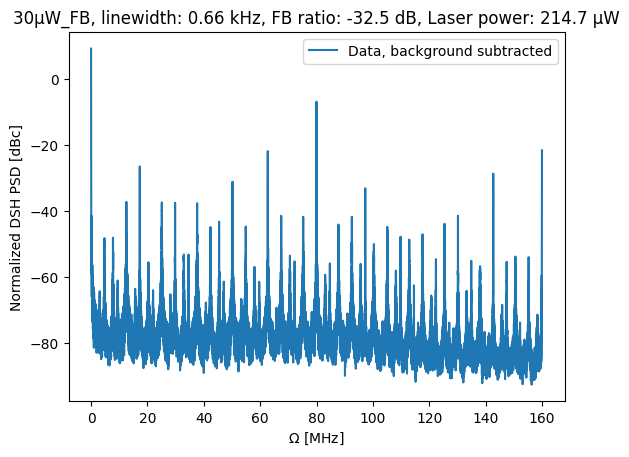

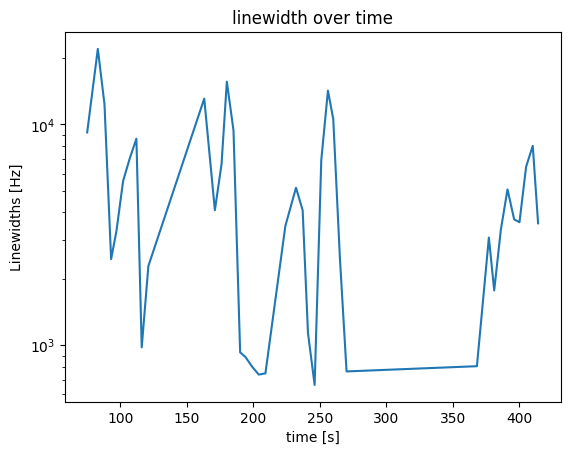

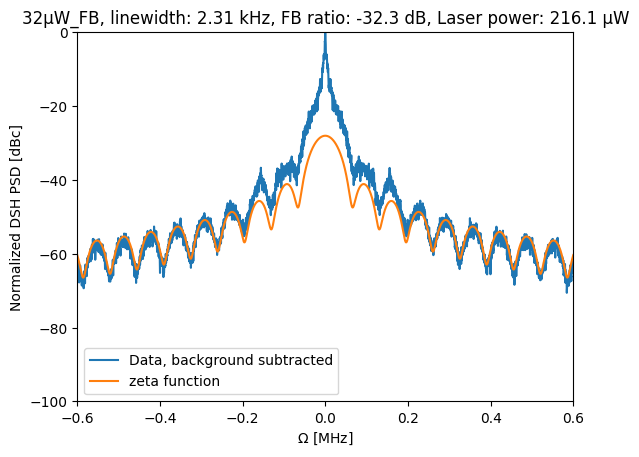

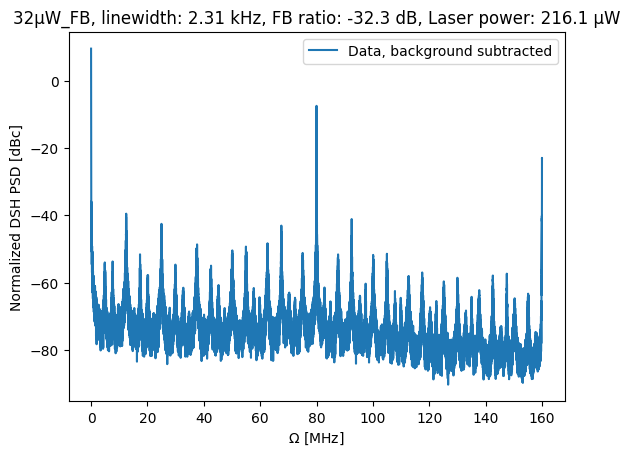

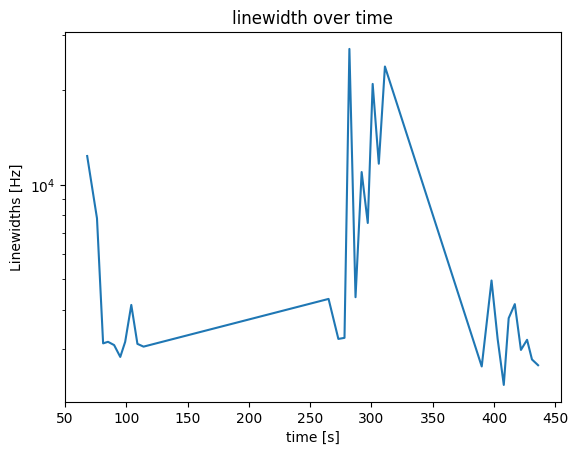

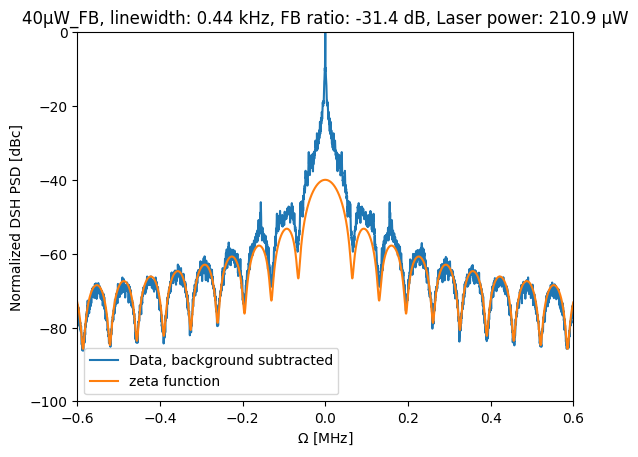

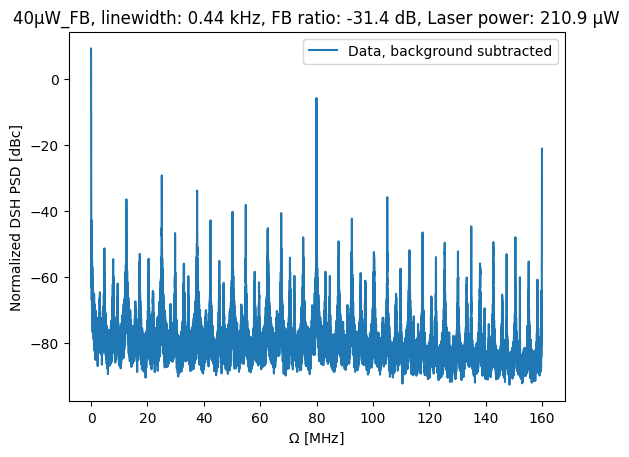

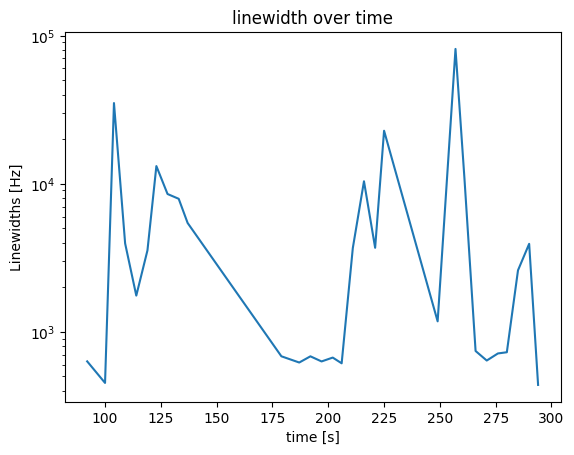

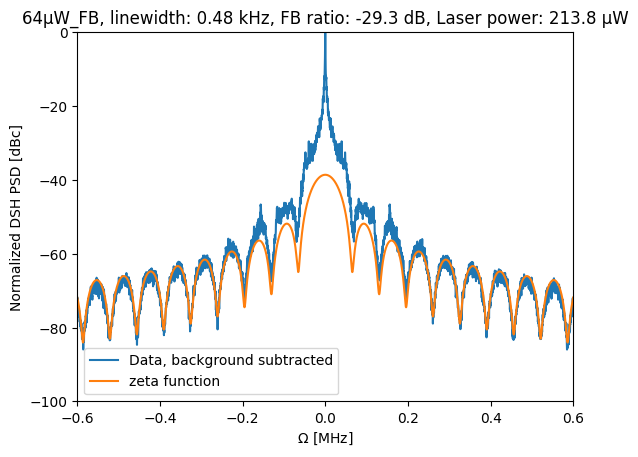

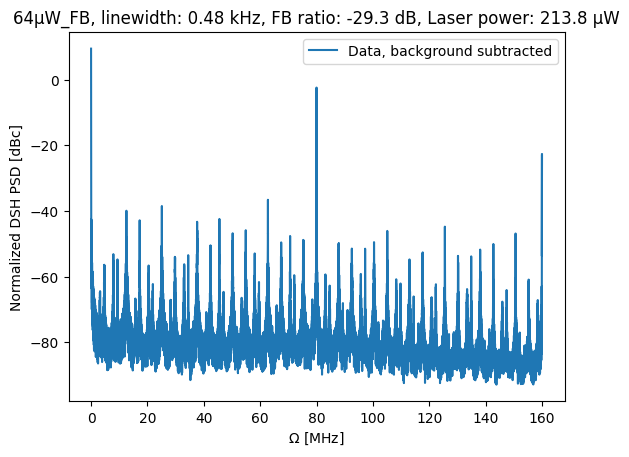

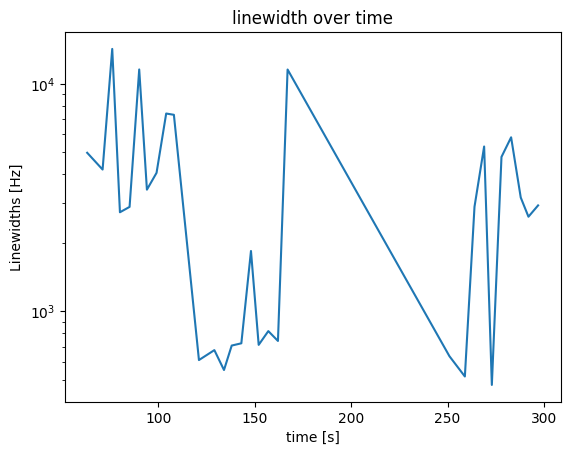

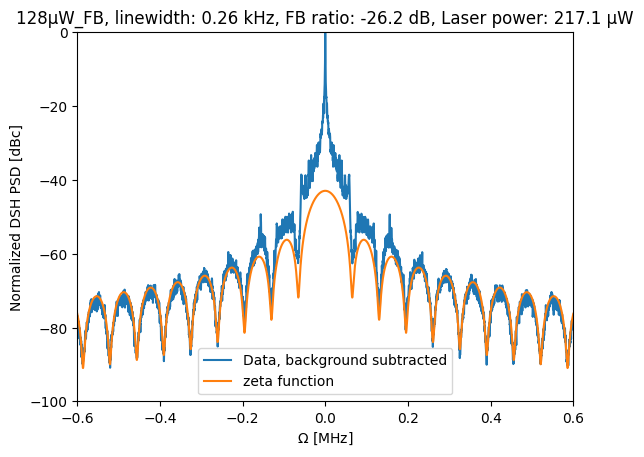

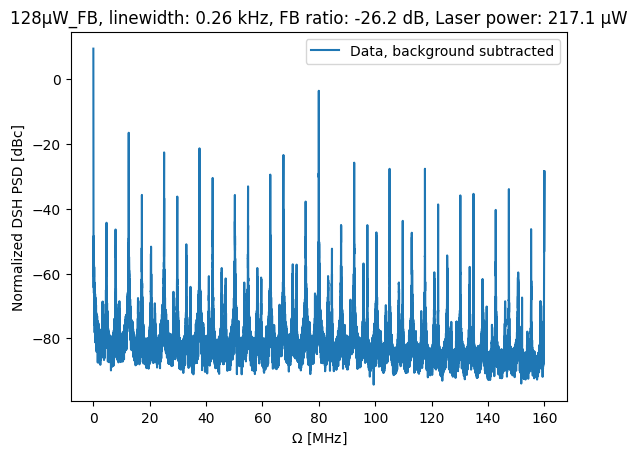

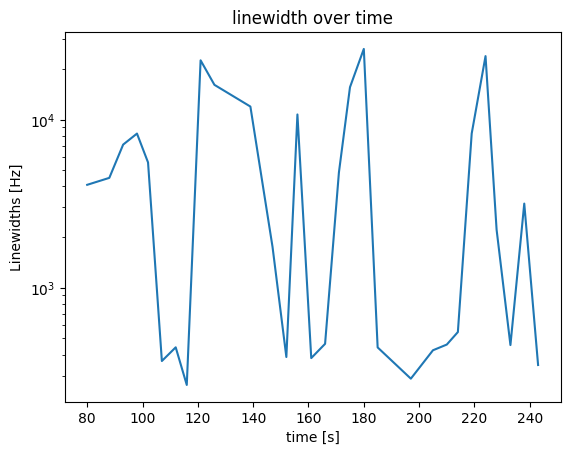

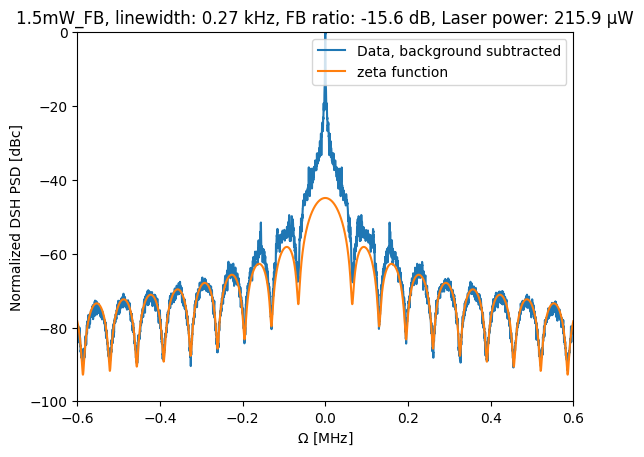

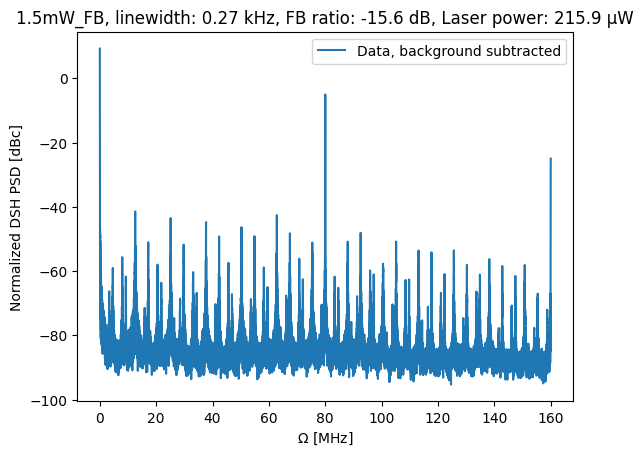

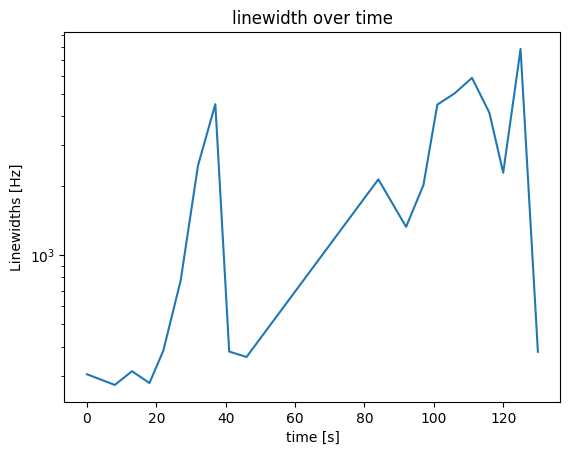

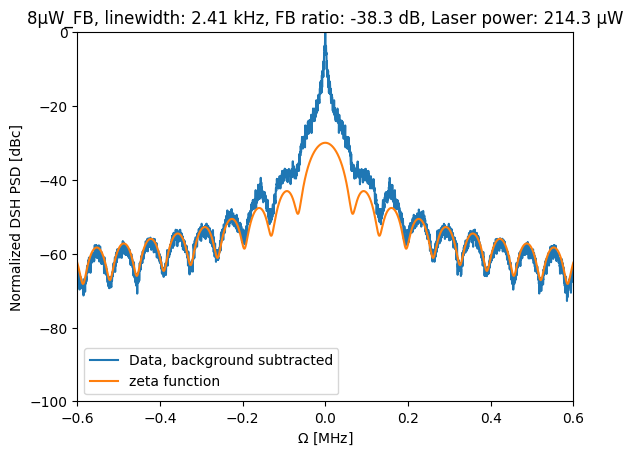

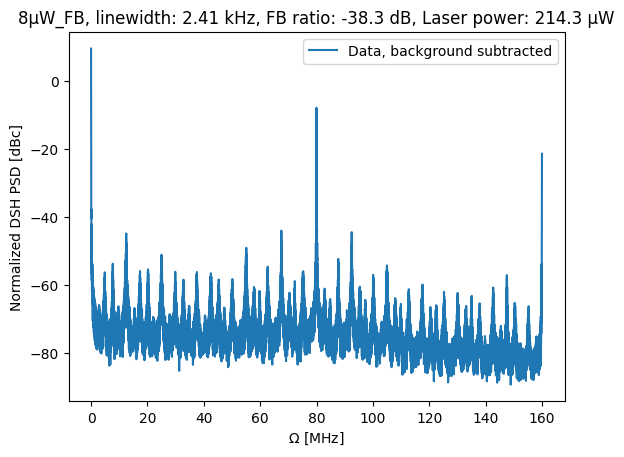

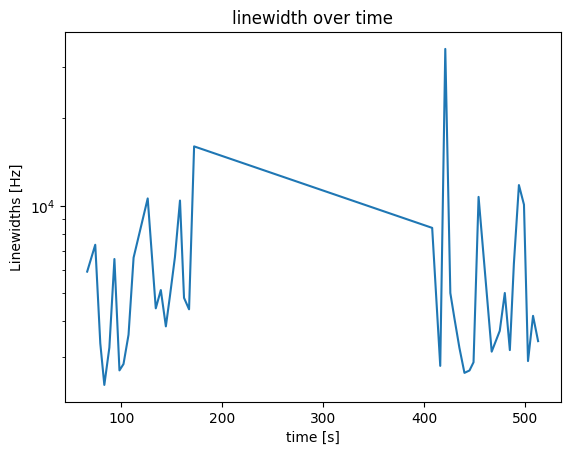

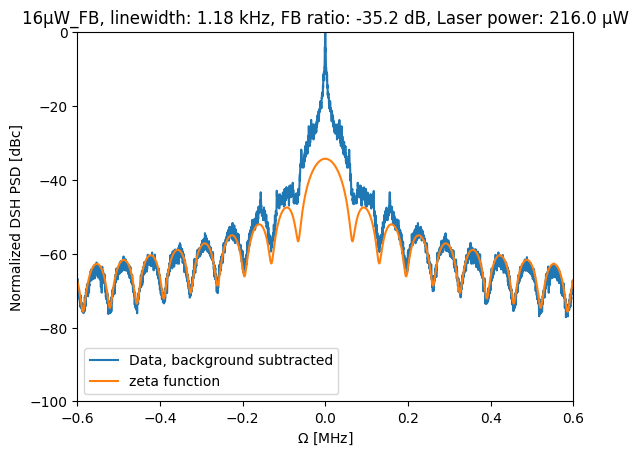

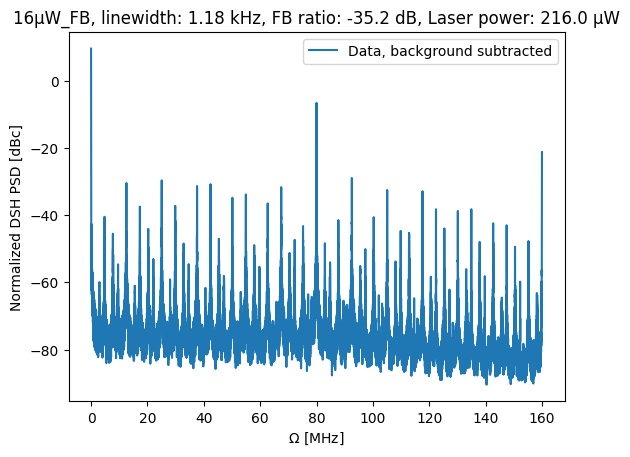

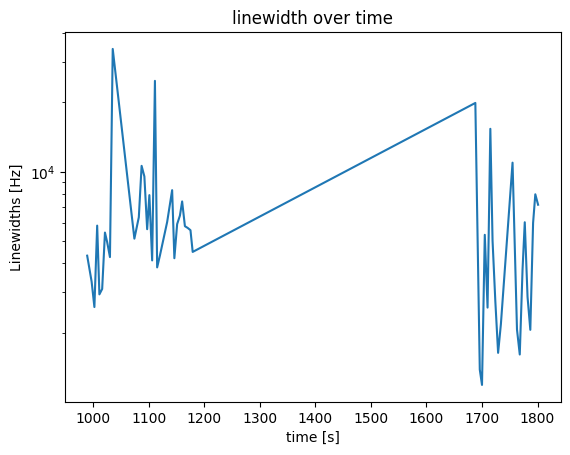

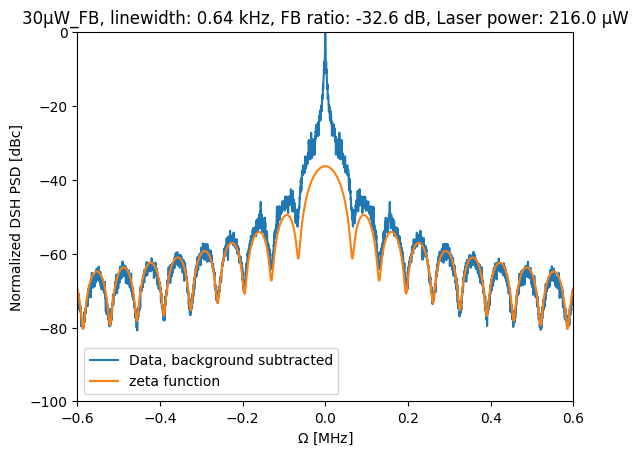

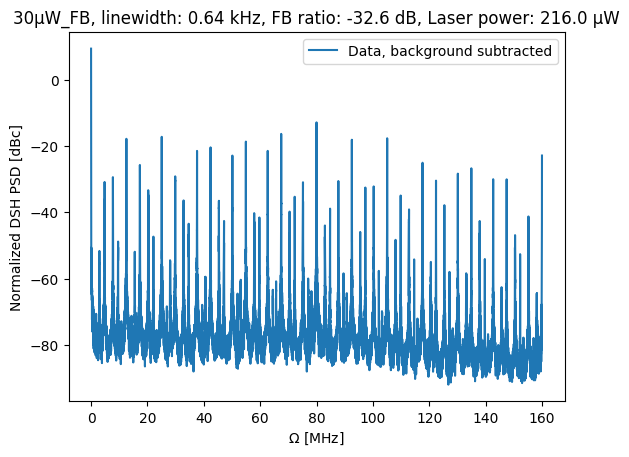

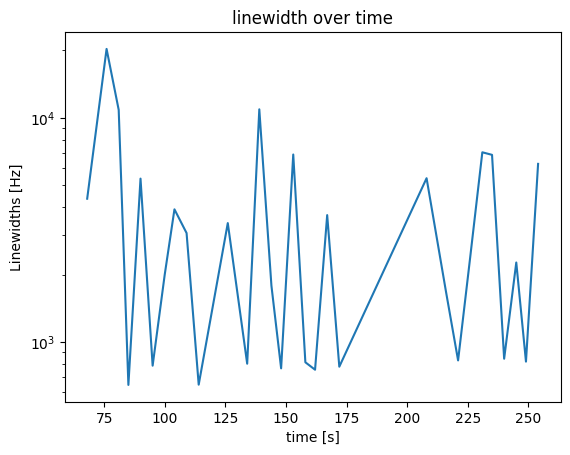

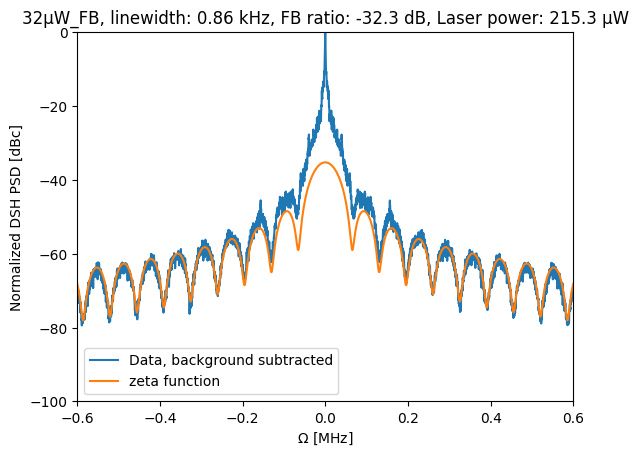

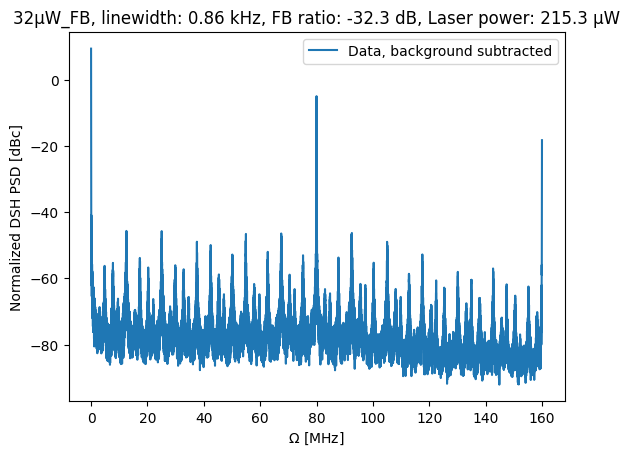

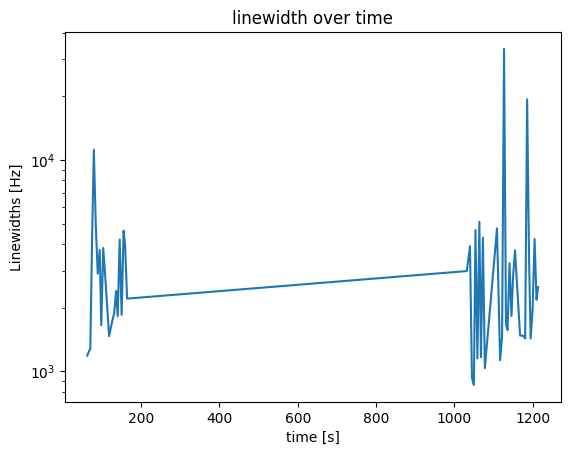

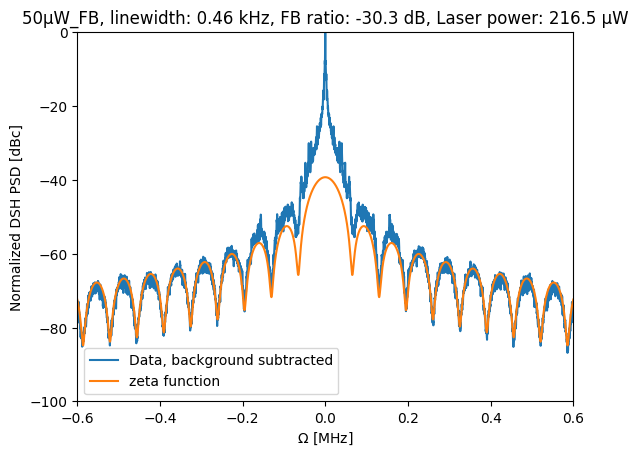

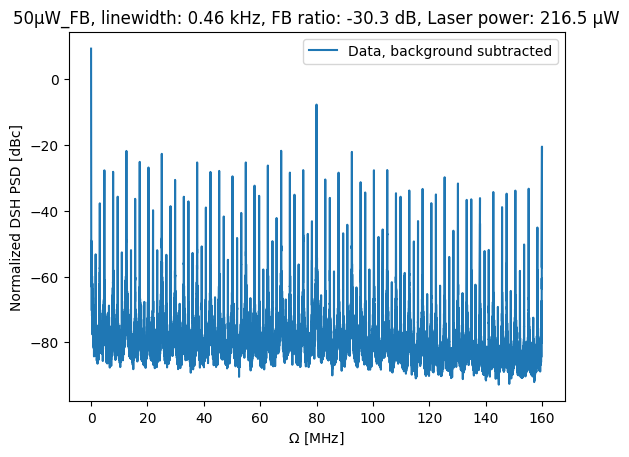

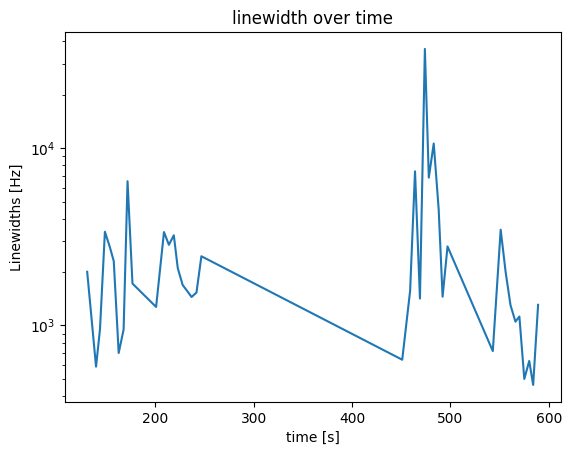

In [ ]:
#Saving the plots with the lowest linewidths

best_linewidths = [[None for _ in range(datasets_no)] for _ in range(2)]


for data_index in range(datasets_no):

    lowest_linewidth = min([v for v in linewidths[data_index] if v != None])

    i = linewidths[data_index].index(lowest_linewidth)

    fs = measurements[data_index][i][0]
    ps = measurements[data_index][i][1] - max(measurements[data_index][i][1])

    filter = (abs(fs) > 0.2) & (abs(fs) < 0.4)

    params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[3*10**3,25,3140])

    print(f'Linewidth: {params[0]}, offset: {params[1]}, delay length: {params[2]}')


    linewidths[data_index][i] = params[0]
    #linewidth_lor.append(params[0])


    laser_power = laser_powers[data_index][i]
    feedback_power = feedback_powers[data_index][i]

    feedback_ratio = feedback_ratios[data_index][i]

    best_linewidths[0][data_index] = feedback_ratio
    best_linewidths[1][data_index] = lowest_linewidth


    plt.figure()
    plt.plot(fs,ps, label = 'Data, background subtracted')
    plt.plot(fs,ff.zeta_fit(fs*10**6,params[0],params[1],params[2]), label = 'zeta function')
    plt.title(fr'{data_dirs[data_index][105:-23]}, linewidth: {params[0]*1e-3:.2f} kHz, FB ratio: {feedback_ratio:.1f} dB, Laser power: {laser_power*1e6:.1f} µW')
    plt.legend()

    plt.xlim([-.6,.6])
    plt.ylim([-100,0])

    plt.xlabel(r'$\Omega$ [MHz]')
    plt.ylabel(r'Normalized DSH PSD [dBc]')

    try:
        if data_index == 0:
            os.mkdir(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}')
    except:
        pass 
    
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}\{data_dirs[data_index][96:]}_ESA_spectrum_zeta_fit_low_linewidth_best.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}\{data_dirs[data_index][96:]}_ESA_spectrum_zeta_fit_low_linewidth_best.png')




    fs_full = dirs[data_index][0][i].freqs 
    ps_full = dirs[data_index][0][i].powers

    plt.figure()
    plt.plot(fs_full,ps_full, label = 'Data, background subtracted')
    #plt.plot(fs_full,ff.zeta_fit(fs*10**6,params[0],params[1],params[2]), label = 'zeta function')
    plt.title(fr'{data_dirs[data_index][105:-23]}, linewidth: {params[0]*1e-3:.2f} kHz, FB ratio: {feedback_ratio:.1f} dB, Laser power: {laser_power*1e6:.1f} µW')
    plt.legend()

    #plt.xlim([-.6,.6])
    #plt.ylim([-80,0])

    plt.xlabel(r'$\Omega$ [MHz]')
    plt.ylabel(r'Normalized DSH PSD [dBc]')


    
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}\{data_dirs[data_index][96:]}_ESA_full_spectrum_low_linewidth_best.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}\{data_dirs[data_index][96:]}_ESA_full_spectrum_low_linewidth_best.png')


    plt.figure()
    plt.plot(start_times[data_index],linewidths[data_index])
    plt.title('linewidth over time')
    plt.xlabel('time [s]')
    plt.ylabel('Linewidths [Hz]')
    plt.yscale('log')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}\{data_dirs[data_index][96:]}_linewidths_vs_time.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}\{data_dirs[data_index][96:]}_linewidths_vs_time.png')


In [ ]:
data_dir_1km=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_0.25µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km1=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_0.5µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km2=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km3=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km4=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_2µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km5=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_3µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km6=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km7=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_6µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km8=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_8µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km9=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_10µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km10=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_15µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km11=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_20µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km12=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_30µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km13=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_40µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km14=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_50µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km15=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_100µW_FB_1kmMeasurements_2024-05-30"

data_dir_1km16=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5mW_FB_1kmMeasurements_2024-05-30"


data_dirs_1km = [data_dir_1km,data_dir_1km1,data_dir_1km2, data_dir_1km3, data_dir_1km4, data_dir_1km5, data_dir_1km6, data_dir_1km7, data_dir_1km8, data_dir_1km9, data_dir_1km10, data_dir_1km11, data_dir_1km12, data_dir_1km13, data_dir_1km14, data_dir_1km15, data_dir_1km16]
datasets_no_1km = len(data_dirs_1km)# len(data_dir_1kms)

#path_coherent = r"C:\Users\au622616\OneDrive - Aarhus universitet\U shaped measurements\ESA_spectrum_Feedback measurement.txt"
dirs_1km= []

for i in range(datasets_no_1km):

    dirs_1km.append(ld.get_lab_session_data(data_dirs_1km[i]))

#ld.get_all_data()

In [ ]:
measurements_1km = [[[]for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]

laser_powers_1km = [[None for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]
laser_lists_1km = [[[]for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]
las_var_1km = [[None for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]

feedback_powers_1km = [[None for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]
fb_var_1km = [[None for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]
feedback_lists_1km = [[[]for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]

start_times_1km =[[None for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]

list_of_dicts_1km = [[{} for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]


for data_index in range(datasets_no_1km):
    #fig, ax = plt.subplots()
    #artists = []

    #if data_index < 3:
    for i, directory in enumerate(dirs_1km[data_index][1]): #Close spectrum is index 1
        
        if directory == None:
            pass
        else:
            fs = directory.freqs #Obtaining ESA close spectrum frequencies
            ps = directory.powers #Obtaining ESA close spectrum powers

            plot = False
        
            #fs, ps = dp.get_close_spectrum_from_folder(directory,plot=plot,center_about_carrier=True)

            measurements_1km[data_index][i] = fs, ps

            list_of_dicts_1km[data_index][i] = directory.params



            try:
                if dirs_1km[data_index][3].las_avg[i] != None: #If there is a separate laser file

                    laser_powers_1km[data_index][i] = dirs_1km[data_index][3].las_avg[i]
                    las_var_1km[data_index][i] = dirs_1km[data_index][3].las_var[i]
                    laser_lists_1km[data_index][i] =  dirs_1km[data_index][3].laser_powers[i]


                else:
                
                    laser_powers_1km[data_index][i] = list_of_dicts_1km[data_index][i]['Laser power']
                    las_var_1km[data_index][i] = None
            except AttributeError:
                
                pow_time_dict = dirs_1km[data_index][3][i]

                laser_lists_1km[data_index][i] = pow_time_dict['laser_power']

                laser_powers_1km[data_index][i] = np.average(pow_time_dict['laser_power'])

                las_var_1km[data_index][i] = np.var(pow_time_dict['laser_power'])


            try:    
                if dirs_1km[data_index][3].fb_avg[i] != None: #If there is a separate laser file

                    feedback_powers_1km[data_index][i] = dirs_1km[data_index][3].fb_avg[i] #Saves the average power pr measurement
                    fb_var_1km[data_index][i] = dirs_1km[data_index][3].fb_var[i]
                    feedback_lists_1km[data_index][i] =  dirs_1km[data_index][3].fb_powers[i]


                else:

                    feedback_powers_1km[data_index][i] = list_of_dicts_1km[data_index][i]['Feedback power']
                    fb_var_1km[data_index][i] = None
            except AttributeError:
                
                pow_time_dict = dirs_1km[data_index][3][i]

                feedback_lists_1km[data_index][i] = pow_time_dict['feedback_power']

                feedback_powers_1km[data_index][i] = np.average(pow_time_dict['feedback_power'])

                fb_var_1km[data_index][i] = np.var(pow_time_dict['feedback_power'])

            
            if plot:
                    
                plt.figure()
                plt.plot(fs,ps)
                plt.xlim([-0.6,0.6])
                plt.ylim([-120,-40])
                plt.xlabel('Frequency detuning [MHz]')
                plt.ylabel('Spectrum power [dBc]')
                plt.title(f'Plot number {i}')

            try:
                start_times_1km[data_index][i] = dirs_1km[data_index][3][i]['start_time']
            except:
                pass


feedback_ratios_1km = [[[]for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]

for data_index in range(datasets_no_1km):

    max_laser_power = max([value for value in laser_powers_1km[data_index] if value is not None])

    for i in range(len(dirs_1km[data_index][1])):
            
            laser_power = laser_powers_1km[data_index][i]
            feedback_power = feedback_powers_1km[data_index][i]

            if laser_power is not None:

                feedback_ratios_1km[data_index][i] = ld.feedback_ratio(laser_power,feedback_power,max_laser_power)

In [ ]:
# range_of_zeta = [list(range(1,10)) + list(range(11,12)) + list(range(13,29))] # + list(range(66,69))
# range_of_zeta.append(list(range(5,7)) + list(range(8,40)) + list(range(42,63)) + list(range(67,70))) # + list(range(66,69))
# range_of_zeta.append(list(range(20,36)) + list(range(38,41)))
# range_of_zeta.append(list(range(24,25)) + list(range(26,32)) + list(range(33,35)) + list(range(36,37)) + list(range(66,88)) + list(range(90,94)) + list(range(95,96)) + list(range(97,98)) + list(range(99,102)))
# range_of_zeta.append(list(range(13,19)) + list(range(34,43)) + list(range(49,52)))
# range_of_zeta.append( list(range(9,18)) + list(range(34,52)) )
# range_of_zeta.append( list(range(72)) + list(range(73,102)) )
# range_of_zeta.append( list(range(9))) 


#list_of_dicts_zeta = [[{} for _ in range(len(range_of_zeta[i]))] for i in range(3)]
#linewidth_zeta= [[] for _ in range(3)]
#feedback_ratios_zeta = [[] for _ in range(3)]
#laser_powers_zeta = [[] for _ in range(3)]
#feedback_powers_zeta = [[] for _ in range(3)]

linewidths_1km =[[None for _ in range(len(dirs_1km[i][1]))] for i in range(datasets_no_1km)]


for data_index in range(datasets_no_1km):
    #for number, i in enumerate(range_of_zeta[data_index]):
    
    for i in range(len(dirs_1km[data_index][1])):
            
        if dirs_1km[data_index][1][i] ==None:
            pass
        else:
            
            #fs, ps = dp.get_close_spectrum_from_folder(dirs[i],plot=False,center_about_carrier=True)

            fs = measurements_1km[data_index][i][0]
            ps = measurements_1km[data_index][i][1] - max(measurements_1km[data_index][i][1])

            # if data_index == 0 or data_index ==9:
            #     filter = (abs(fs) > 0.2) & (abs(fs) < 0.7)
            # else:
            filter = (abs(fs) > 0.2) & (abs(fs) < 0.8)



            params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[3*10**3,25,1140])



            linewidths_1km[data_index][i] = params[0]
            #linewidth_lor.append(params[0])


            laser_power = laser_powers_1km[data_index][i]
            feedback_power = feedback_powers_1km[data_index][i]

            feedback_ratio = feedback_ratios_1km[data_index][i]

            filter_zeta_plot = abs(fs) < 1


            # plt.figure()
            # plt.plot(fs,ps, label = 'Data, background subtracted')
            # plt.plot(fs[filter_zeta_plot],ff.zeta_fit(fs[filter_zeta_plot]*10**6,params[0],params[1],params[2]), label = 'zeta function')
            # plt.title(f'{data_dirs_1km[data_index][105:-23]}, {data_dirs_1km[data_index][-10:]}  no. {i}, Linewidth: {params[0]*1e-3:.1f} kHz, feedback ratio: {feedback_ratio:.2f} dB, Laser power: {laser_power*1e6:.1f} µW')
            # plt.legend()

            # plt.xlim([-0.8,0.8])
            # plt.ylim([-100,0])


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 26435.89344019717, offset: 41.75822557783126, delay length: 1003.1245669319078


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 19368.436098015132, offset: 38.70208973228855, delay length: 998.0886896680244
Linewidth: 11230.952321466684, offset: 33.885795542342244, delay length: 997.5319079071851
Linewidth: 8574.427123381249, offset: 29.85876790326214, delay length: 996.6992982151386
Linewidth: 5849.432515620198, offset: 29.850081434081716, delay length: 995.4116271949604
Linewidth: 4558.646836953093, offset: 29.211442690099073, delay length: 995.7074675272623
Linewidth: 3600.0081002500397, offset: 28.31903498057615, delay length: 995.7951553232341


C:\Users\au617810\AppData\Local\Temp\ipykernel_12144\1194930421.py:78: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Linewidth: 2424.368217286293, offset: 26.515745911133294, delay length: 995.8574597179971
Linewidth: 3402.1092521206438, offset: 24.51708005148218, delay length: 995.3657865984092


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 2976.936207588575, offset: 30.301396971968362, delay length: 995.4793750764198


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 2327.6274977124235, offset: 30.52542329694665, delay length: 994.9914428161217
Linewidth: 2159.0791808970307, offset: 22.690635737561085, delay length: 995.8276056527144
Linewidth: 1997.055628697014, offset: 20.257146746077158, delay length: 995.297212072148
Linewidth: 1556.1070001278333, offset: 27.256286799630935, delay length: 995.4628813203365
Linewidth: 1685.5796207542712, offset: 23.243088089771945, delay length: 995.3227793795971
Linewidth: 1591.8185611790682, offset: 23.848703295060798, delay length: 995.7458550556715


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 1825.5196848791645, offset: 17.72863713435783, delay length: 995.8960699779652


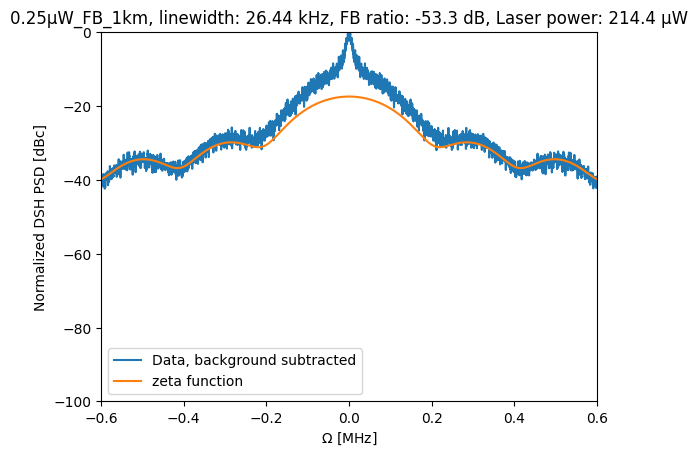

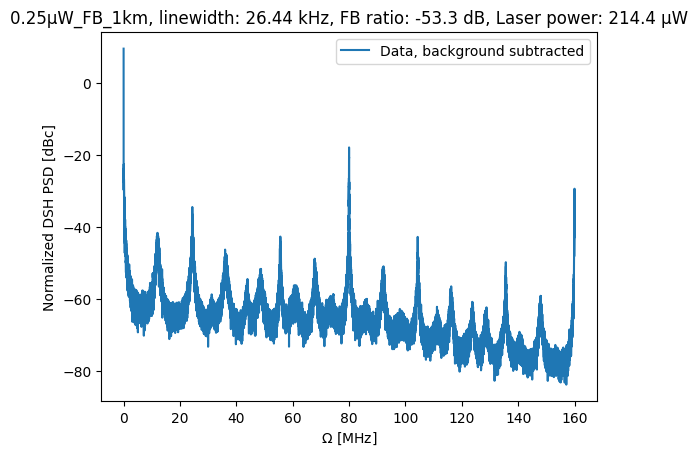

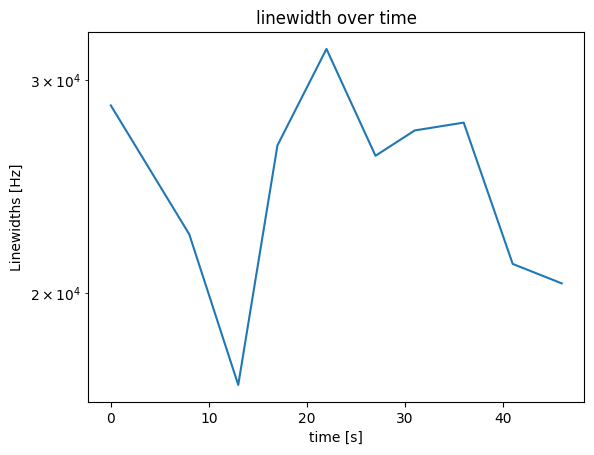

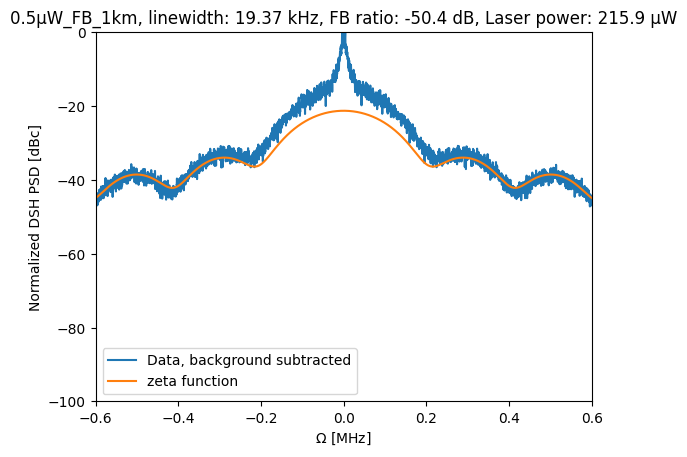

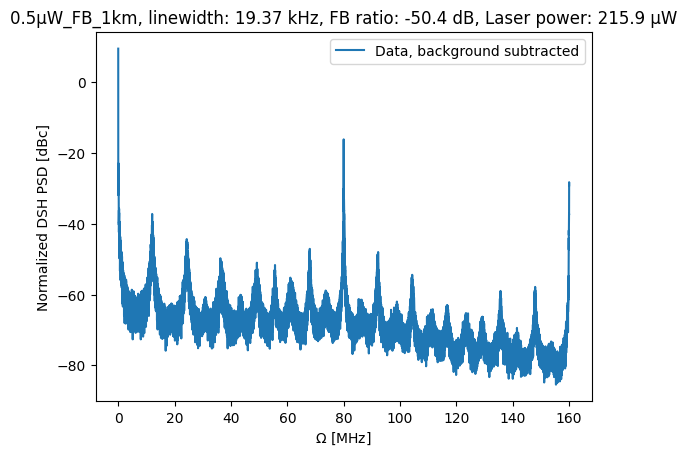

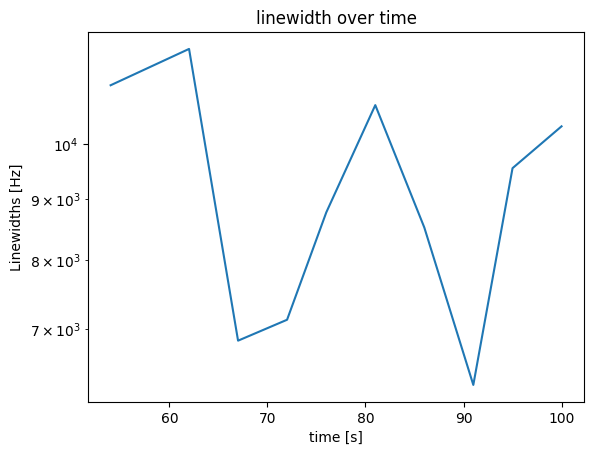

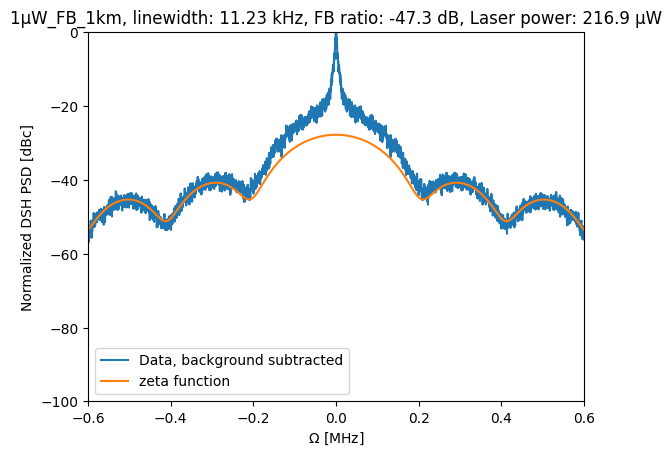

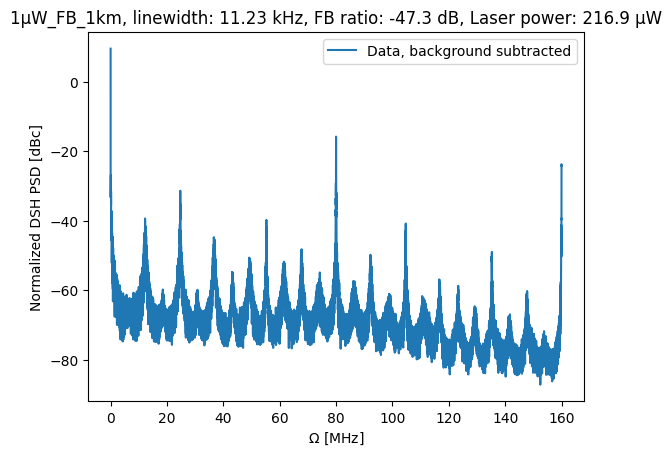

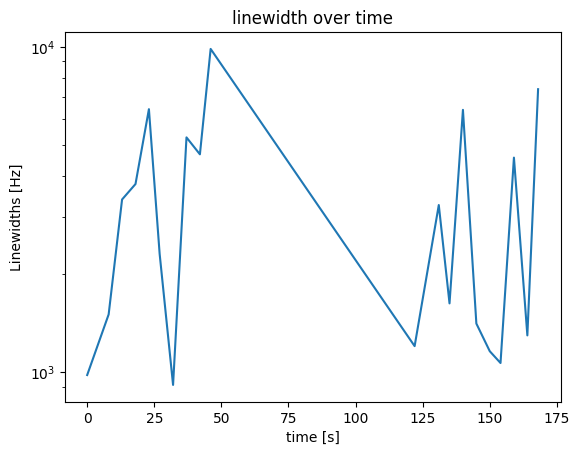

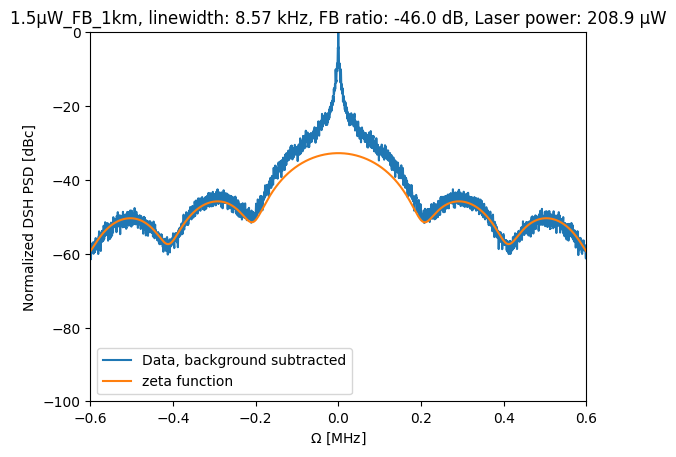

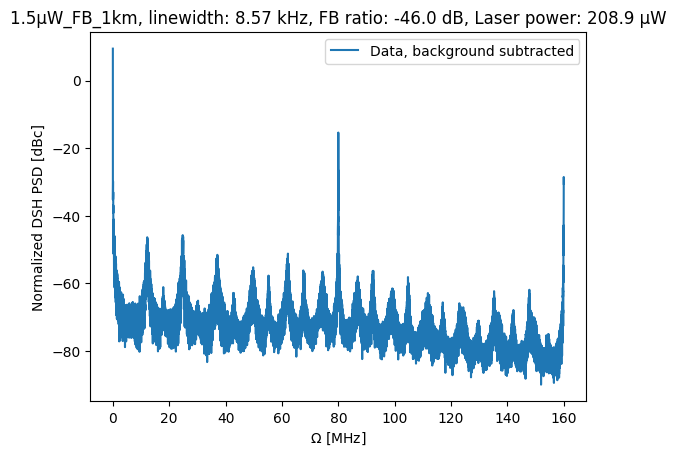

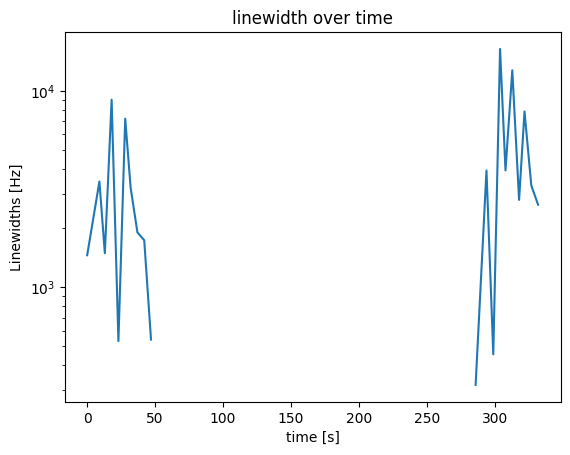

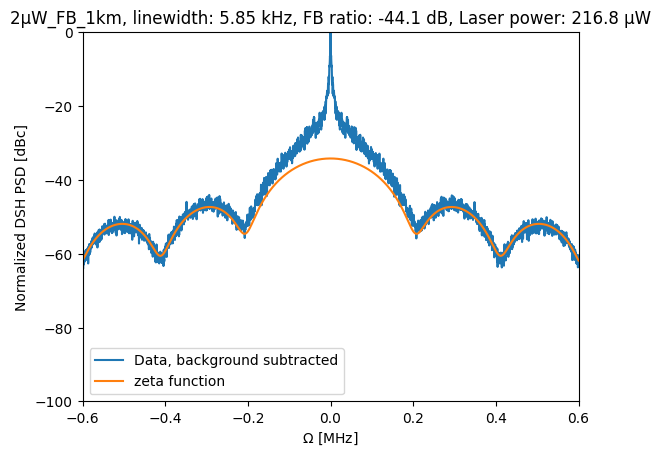

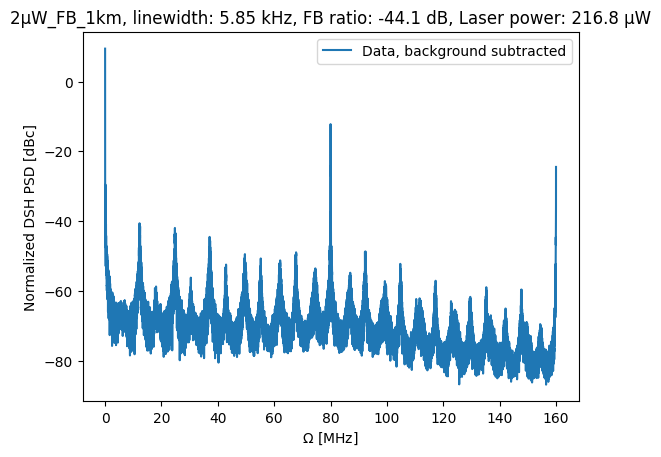

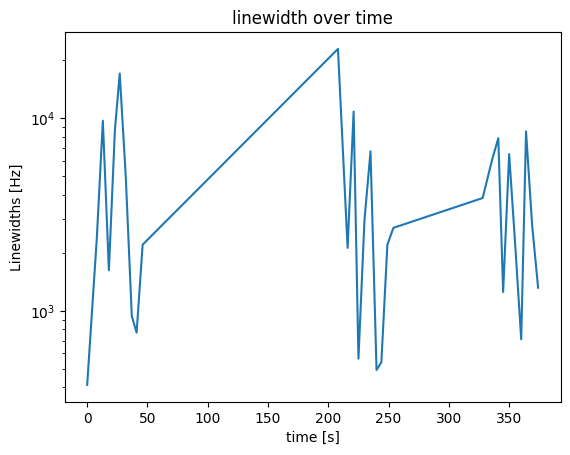

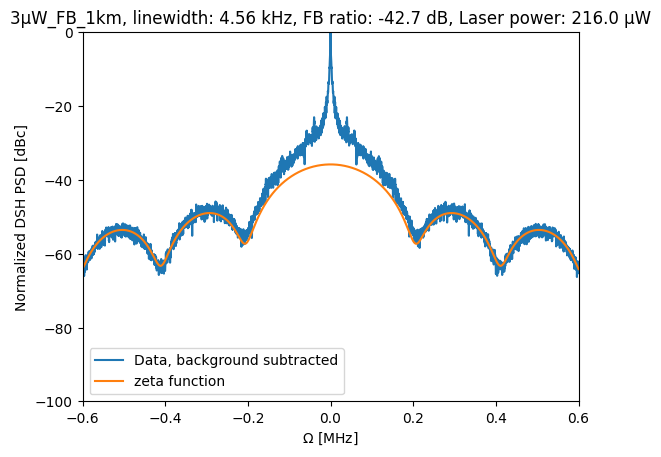

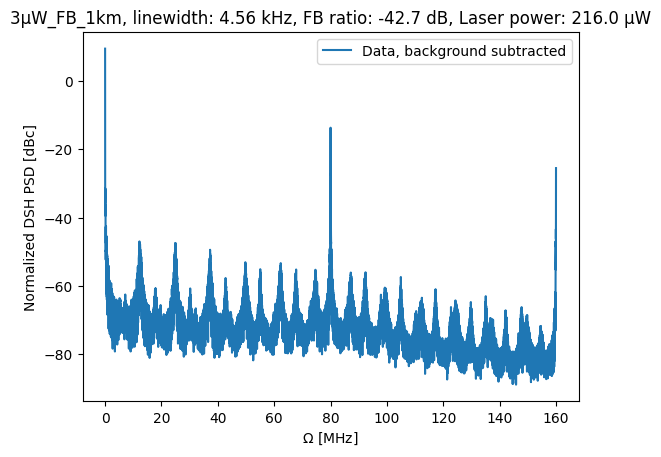

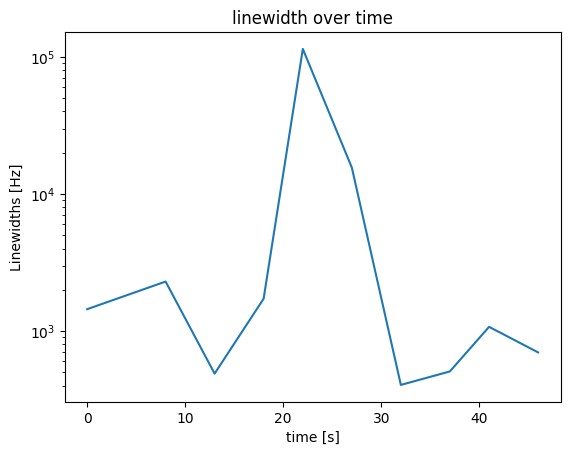

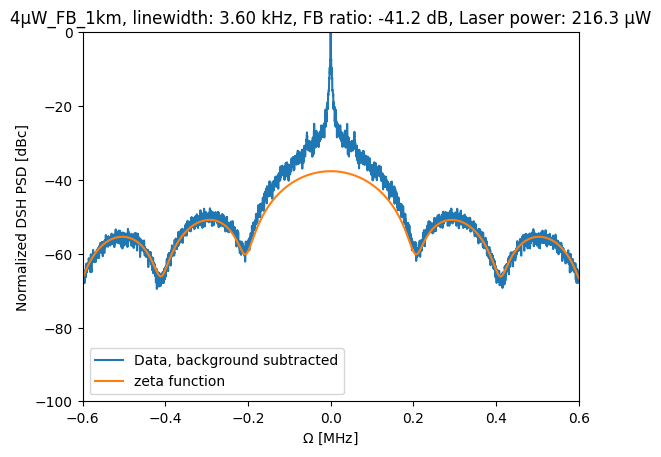

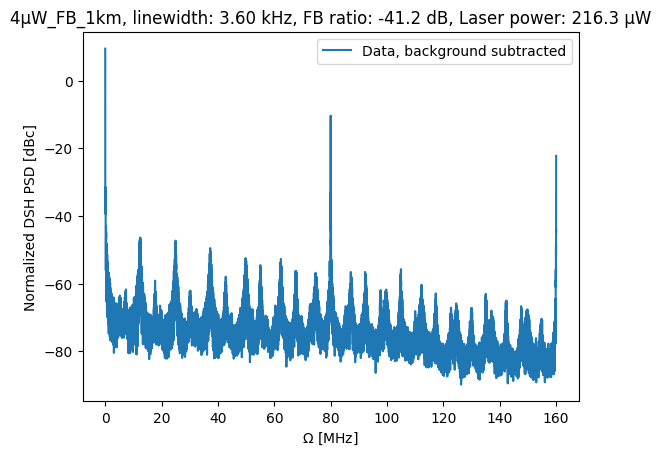

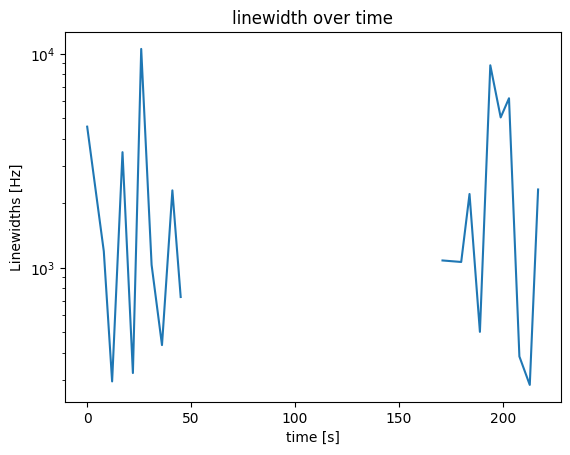

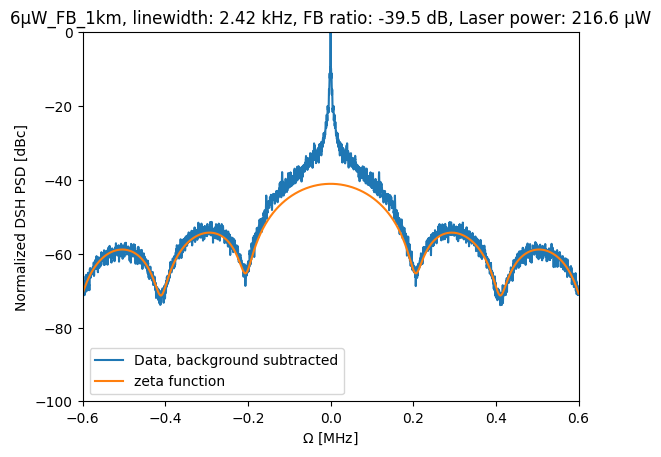

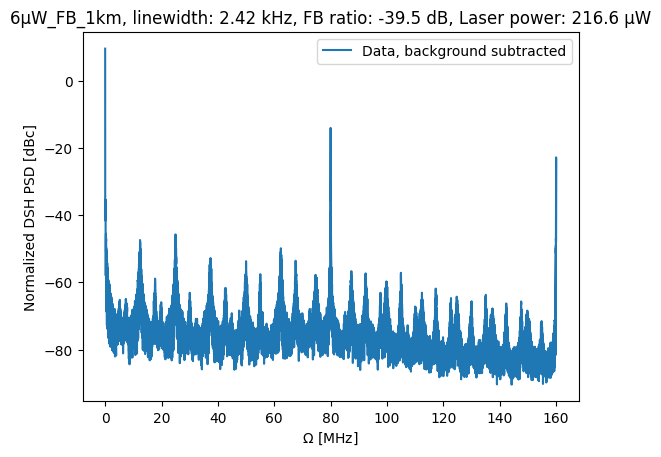

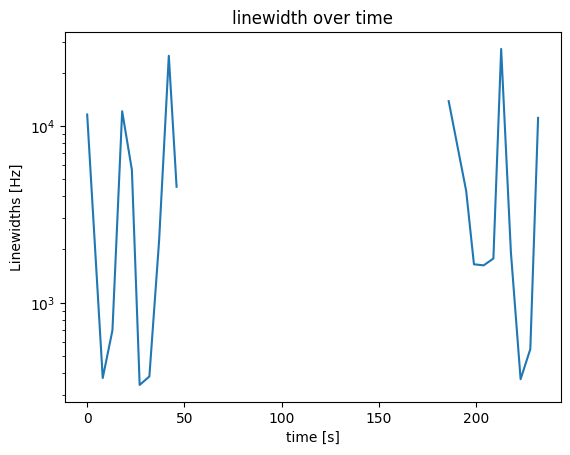

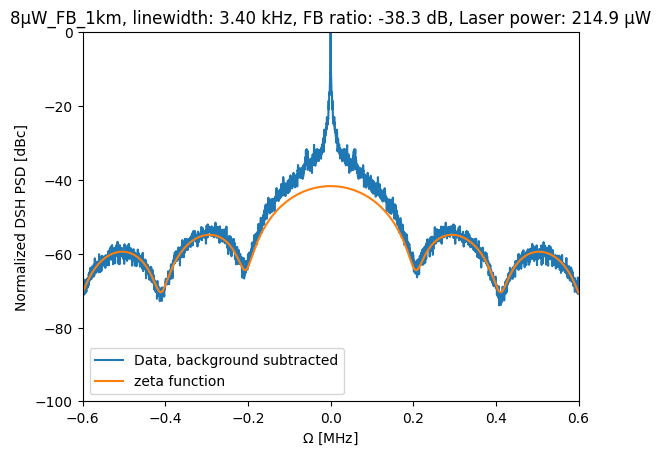

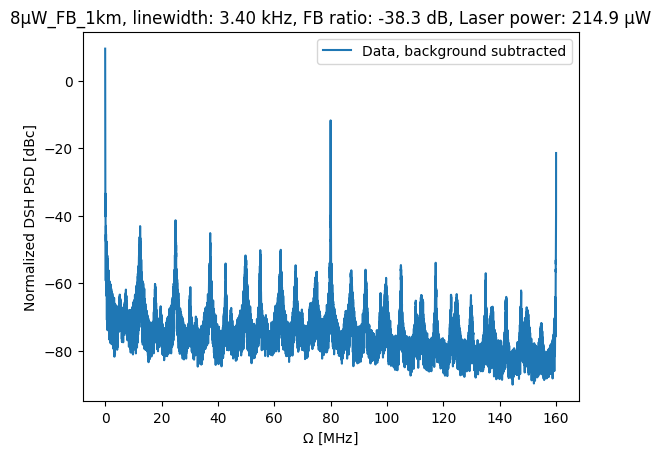

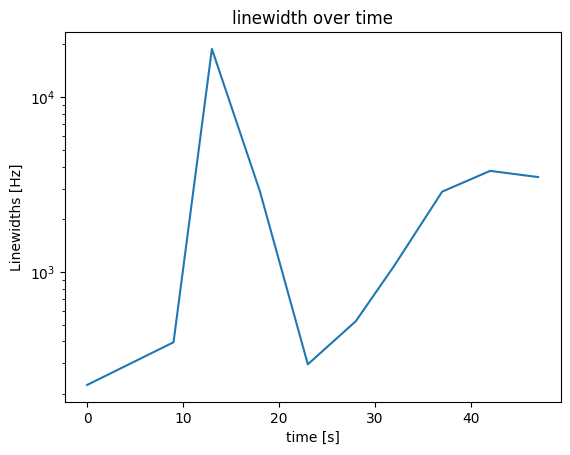

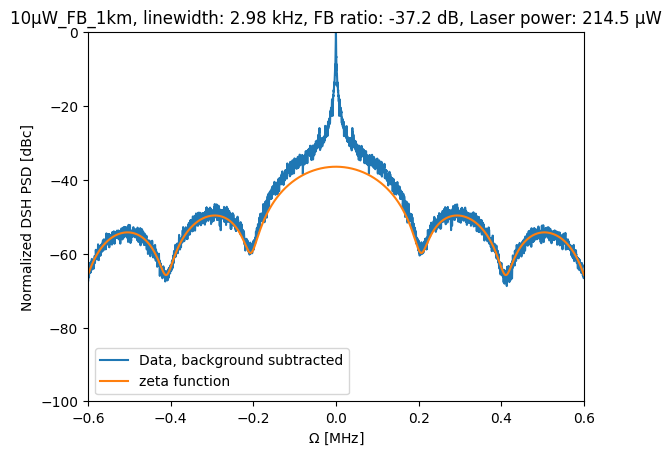

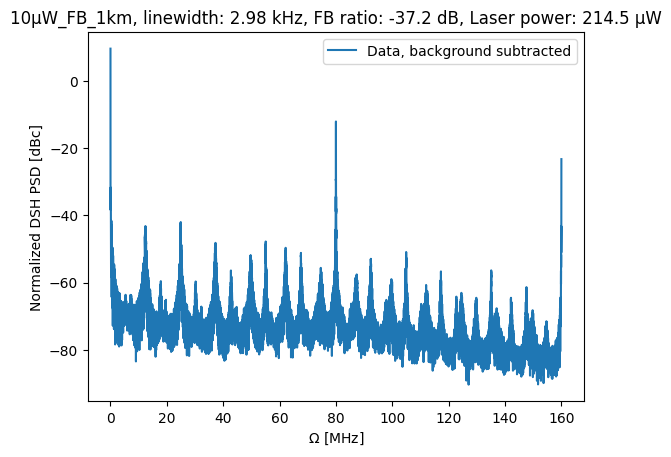

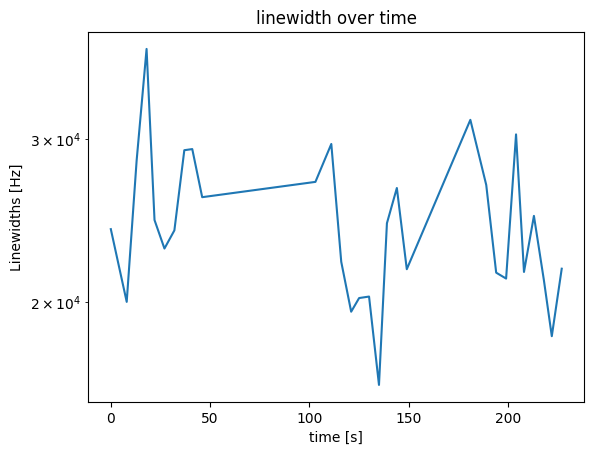

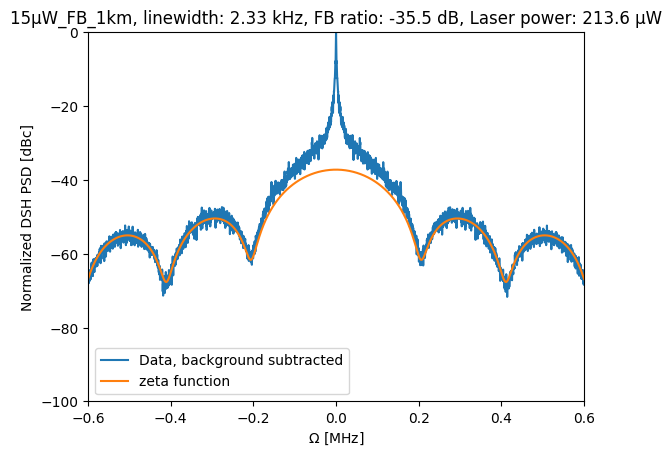

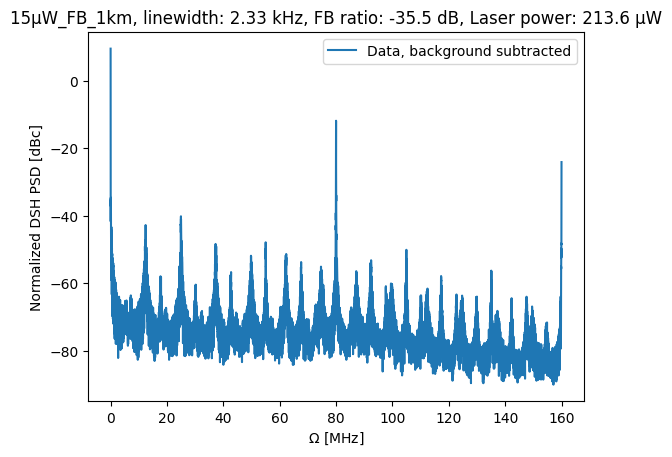

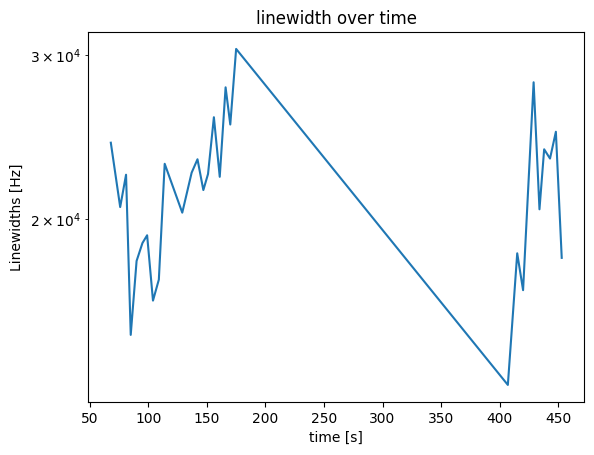

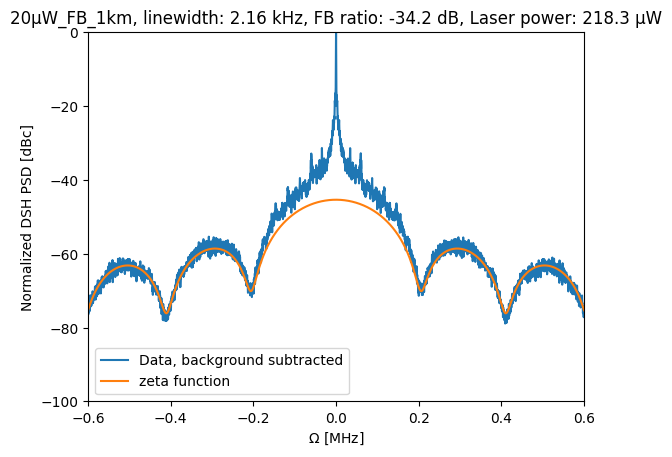

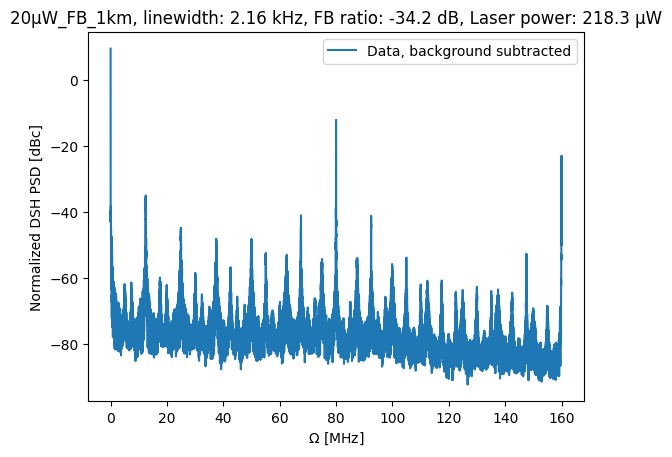

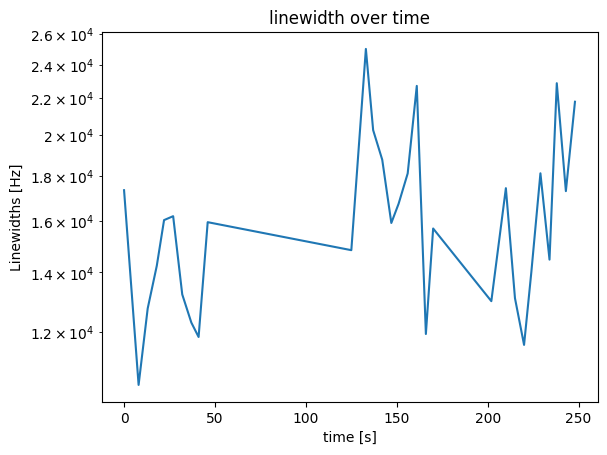

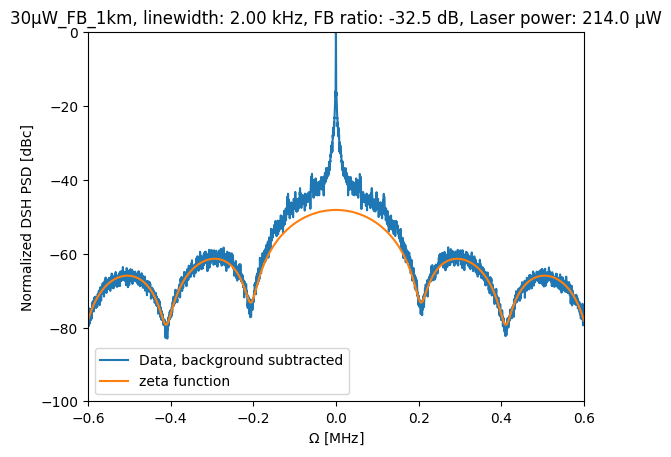

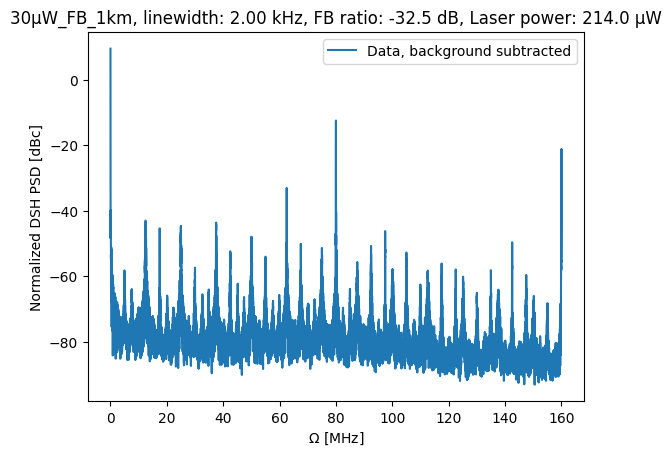

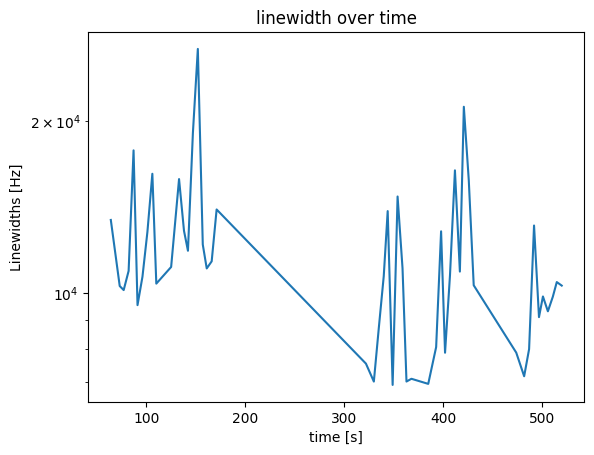

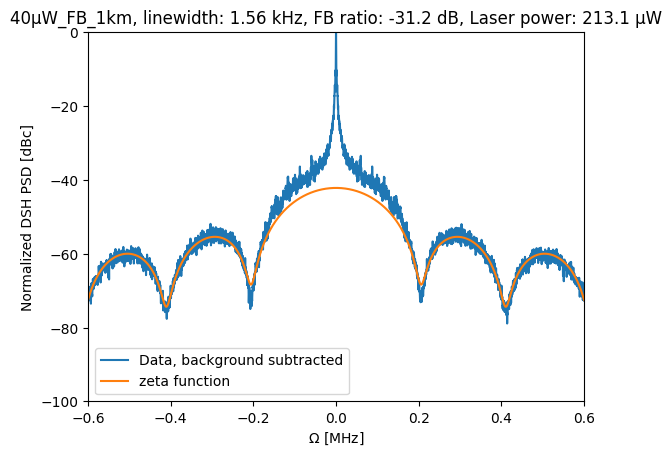

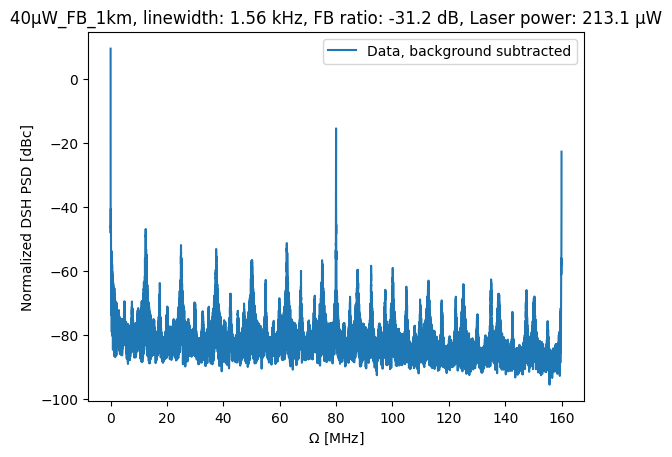

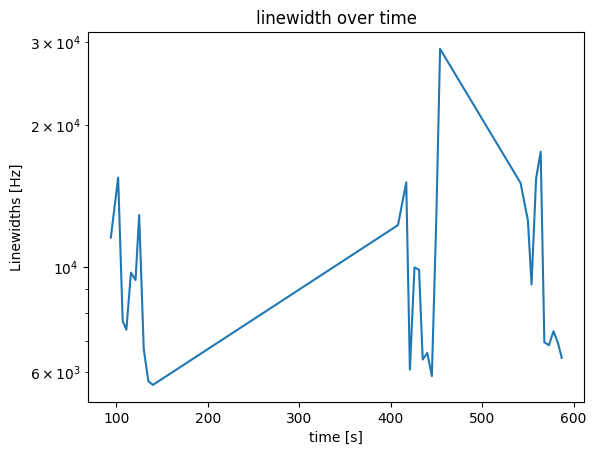

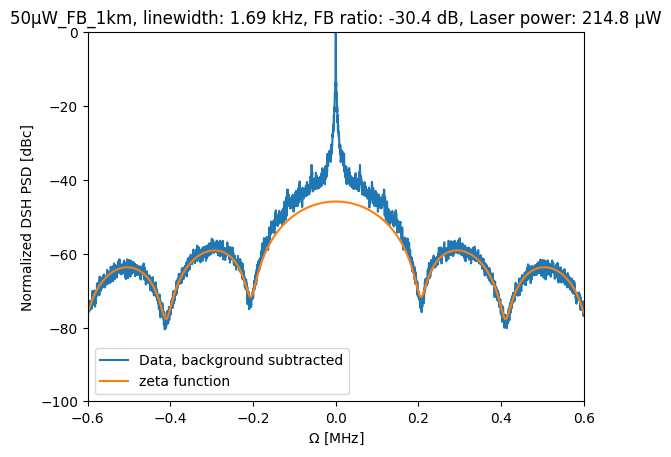

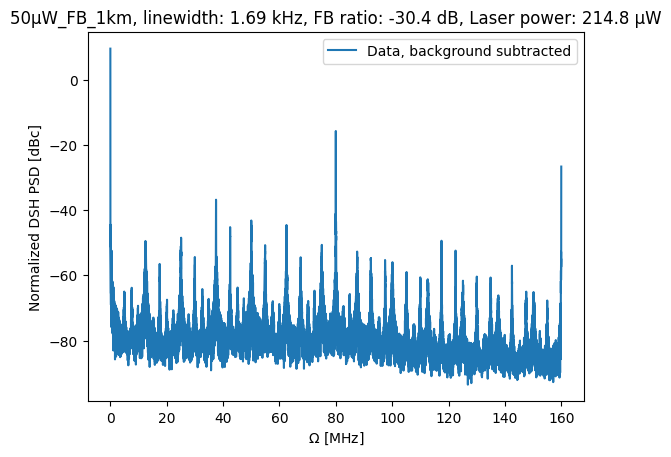

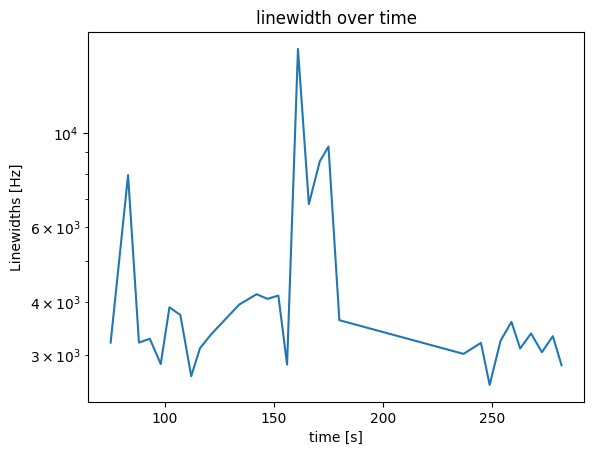

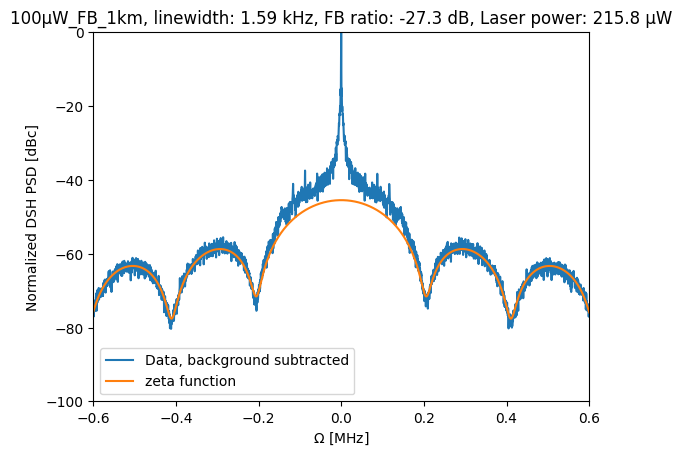

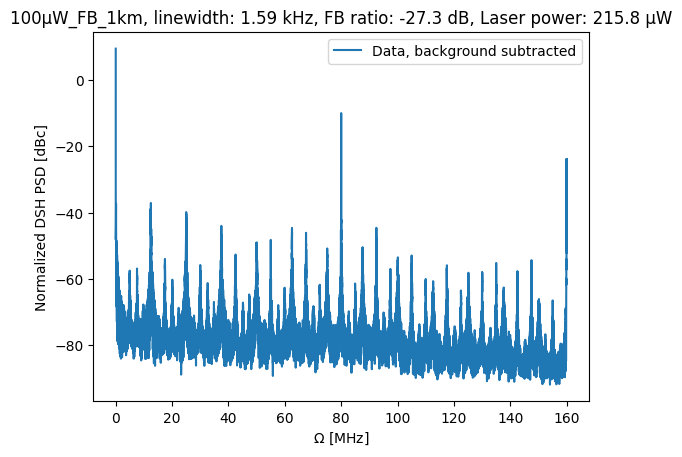

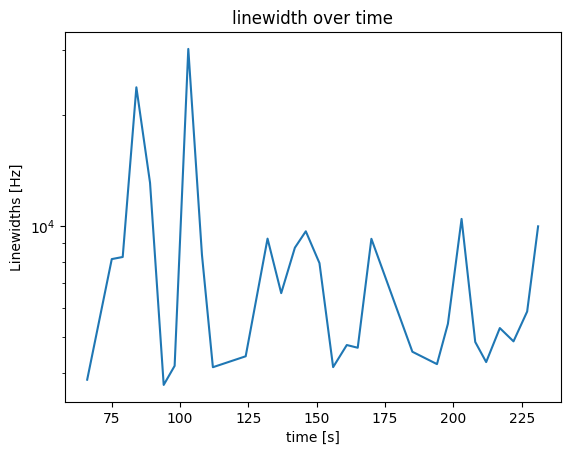

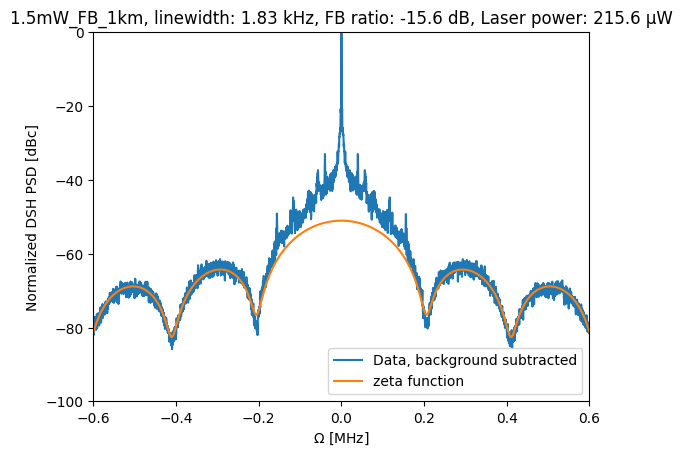

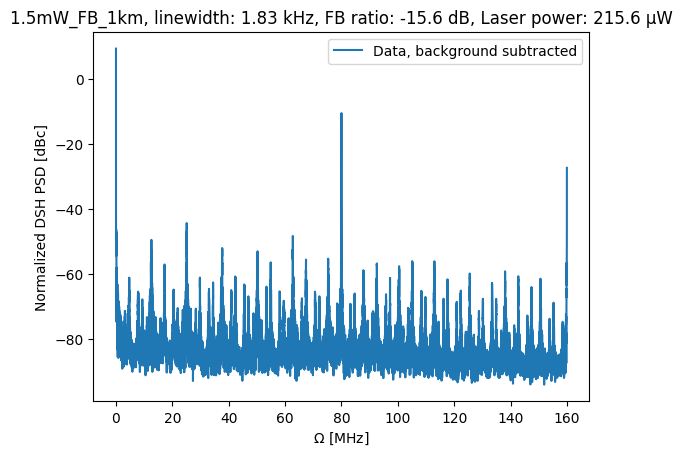

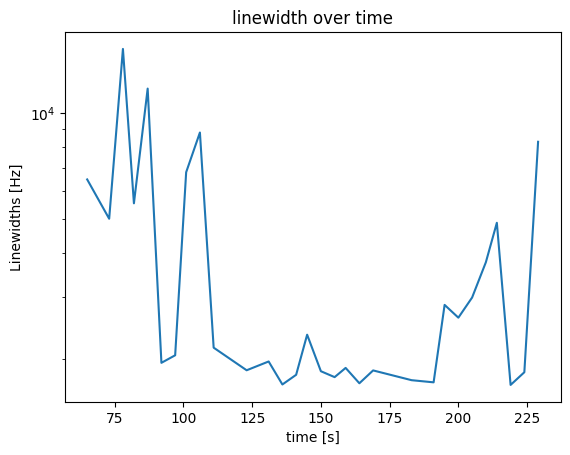

In [ ]:
#Saving the plots with the lowest linewidths

best_linewidths_1km = [[None for _ in range(datasets_no_1km)] for _ in range(2)]


for data_index in range(datasets_no_1km):

    lowest_linewidth = min([v for v in linewidths_1km[data_index] if v != None])

    i = linewidths_1km[data_index].index(lowest_linewidth)

    fs = measurements_1km[data_index][i][0]
    ps = measurements_1km[data_index][i][1] - max(measurements_1km[data_index][i][1])

    filter = (abs(fs) > 0.2) & (abs(fs) < 0.8)

    params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[3*10**3,25,1140])

    print(f'Linewidth: {params[0]}, offset: {params[1]}, delay length: {params[2]}')


    linewidths_1km[data_index][i] = params[0]
    #linewidth_lor.append(params[0])


    laser_power = laser_powers_1km[data_index][i]
    feedback_power = feedback_powers_1km[data_index][i]

    feedback_ratio = feedback_ratios_1km[data_index][i]

    best_linewidths_1km[0][data_index] = feedback_ratio
    best_linewidths_1km[1][data_index] = lowest_linewidth


    plt.figure()
    plt.plot(fs,ps, label = 'Data, background subtracted')
    plt.plot(fs,ff.zeta_fit(fs*10**6,params[0],params[1],params[2]), label = 'zeta function')
    plt.title(fr'{data_dirs_1km[data_index][105:-23]}, linewidth: {params[0]*1e-3:.2f} kHz, FB ratio: {feedback_ratio:.1f} dB, Laser power: {laser_power*1e6:.1f} µW')
    plt.legend()

    plt.xlim([-.6,.6])
    plt.ylim([-100,0])

    plt.xlabel(r'$\Omega$ [MHz]')
    plt.ylabel(r'Normalized DSH PSD [dBc]')

    try:
        if data_index == 0:
            os.mkdir(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km')
    except:
        pass 
    
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km\{data_dirs_1km[data_index][96:]}_ESA_spectrum_zeta_fit_low_linewidth_best.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km\{data_dirs_1km[data_index][96:]}_ESA_spectrum_zeta_fit_low_linewidth_best.png')




    fs_full = dirs_1km[data_index][0][i].freqs 
    ps_full = dirs_1km[data_index][0][i].powers

    plt.figure()
    plt.plot(fs_full,ps_full, label = 'Data, background subtracted')
    #plt.plot(fs_full,ff.zeta_fit(fs*10**6,params[0],params[1],params[2]), label = 'zeta function')
    plt.title(fr'{data_dirs_1km[data_index][105:-23]}, linewidth: {params[0]*1e-3:.2f} kHz, FB ratio: {feedback_ratio:.1f} dB, Laser power: {laser_power*1e6:.1f} µW')
    plt.legend()

    #plt.xlim([-.6,.6])
    #plt.ylim([-80,0])

    plt.xlabel(r'$\Omega$ [MHz]')
    plt.ylabel(r'Normalized DSH PSD [dBc]')
    

    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km\{data_dirs_1km[data_index][96:]}_ESA_full_spectrum_low_linewidth_best.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km\{data_dirs_1km[data_index][96:]}_ESA_full_spectrum_low_linewidth_best.png')

    plt.figure()
    plt.plot(start_times_1km[data_index],linewidths_1km[data_index])
    plt.title('linewidth over time')
    plt.xlabel('time [s]')
    plt.ylabel('Linewidths [Hz]')
    plt.yscale('log')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km\{data_dirs_1km[data_index][96:]}_linewidths_vs_time.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1km\{data_dirs_1km[data_index][96:]}_linewidths_vs_time.png')



In [ ]:
data_dir_1550nm=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm1=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_2µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm2=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_4µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm3=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_6µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm4=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_10µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm5=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_20µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm6=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_30µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm7=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_50µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm8=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_100µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm9=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_500µW_FB_1550nmMeasurements_2024-05-31"

data_dir_1550nm10=r"O:\Tech_Photonics\Projects\Narrow Linewidth\MFB Chips\Chip 3 Feedback measurements\Linewidth_pol_control_1.5mW_FB_1550nmMeasurements_2024-05-31"


data_dirs_1550nm = [data_dir_1550nm,data_dir_1550nm1,data_dir_1550nm2, data_dir_1550nm3, data_dir_1550nm4, data_dir_1550nm5, data_dir_1550nm6, data_dir_1550nm7, data_dir_1550nm8, data_dir_1550nm9, data_dir_1550nm10]
datasets_no_1550nm = len(data_dirs_1550nm)# len(data_dir_1550nms)

#path_coherent = r"C:\Users\au622616\OneDrive - Aarhus universitet\U shaped measurements\ESA_spectrum_Feedback measurement.txt"
dirs_1550nm= []

for i in range(datasets_no_1550nm):

    dirs_1550nm.append(ld.get_lab_session_data(data_dirs_1550nm[i]))

#ld.get_all_data()

In [ ]:
measurements_1550nm = [[[]for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]

laser_powers_1550nm = [[None for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]
laser_lists_1550nm = [[[]for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]
las_var_1550nm = [[None for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]

feedback_powers_1550nm = [[None for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]
fb_var_1550nm = [[None for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]
feedback_lists_1550nm = [[[]for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]


list_of_dicts_1550nm = [[{} for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]

start_times_1550nm =[[None for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]

for data_index in range(datasets_no_1550nm):
    #fig, ax = plt.subplots()
    #artists = []

    #if data_index < 3:
    for i, directory in enumerate(dirs_1550nm[data_index][1]): #Close spectrum is index 1
        
        if directory == None:
            pass
        else:
            fs = directory.freqs #Obtaining ESA close spectrum frequencies
            ps = directory.powers #Obtaining ESA close spectrum powers

            plot = False
        
            #fs, ps = dp.get_close_spectrum_from_folder(directory,plot=plot,center_about_carrier=True)

            measurements_1550nm[data_index][i] = fs, ps

            list_of_dicts_1550nm[data_index][i] = directory.params



            try:
                if dirs_1550nm[data_index][3].las_avg[i] != None: #If there is a separate laser file

                    laser_powers_1550nm[data_index][i] = dirs_1550nm[data_index][3].las_avg[i]
                    las_var_1550nm[data_index][i] = dirs_1550nm[data_index][3].las_var[i]
                    laser_lists_1550nm[data_index][i] =  dirs_1550nm[data_index][3].laser_powers[i]


                else:
                
                    laser_powers_1550nm[data_index][i] = list_of_dicts_1550nm[data_index][i]['Laser power']
                    las_var_1550nm[data_index][i] = None
            except AttributeError:
                
                pow_time_dict = dirs_1550nm[data_index][3][i]

                laser_lists_1550nm[data_index][i] = pow_time_dict['laser_power']

                laser_powers_1550nm[data_index][i] = np.average(pow_time_dict['laser_power'])

                las_var_1550nm[data_index][i] = np.var(pow_time_dict['laser_power'])


            try:    
                if dirs_1550nm[data_index][3].fb_avg[i] != None: #If there is a separate laser file

                    feedback_powers_1550nm[data_index][i] = dirs_1550nm[data_index][3].fb_avg[i] #Saves the average power pr measurement
                    fb_var_1550nm[data_index][i] = dirs_1550nm[data_index][3].fb_var[i]
                    feedback_lists_1550nm[data_index][i] =  dirs_1550nm[data_index][3].fb_powers[i]


                else:

                    feedback_powers_1550nm[data_index][i] = list_of_dicts_1550nm[data_index][i]['Feedback power']
                    fb_var_1550nm[data_index][i] = None
            except AttributeError:
                
                pow_time_dict = dirs_1550nm[data_index][3][i]

                feedback_lists_1550nm[data_index][i] = pow_time_dict['feedback_power']

                feedback_powers_1550nm[data_index][i] = np.average(pow_time_dict['feedback_power'])

                fb_var_1550nm[data_index][i] = np.var(pow_time_dict['feedback_power'])

            
            if plot:
                    
                plt.figure()
                plt.plot(fs,ps)
                plt.xlim([-0.6,0.6])
                plt.ylim([-120,-40])
                plt.xlabel('Frequency detuning [MHz]')
                plt.ylabel('Spectrum power [dBc]')
                plt.title(f'Plot number {i}')


            try:
                start_times_1550nm[data_index][i] = dirs_1550nm[data_index][3][i]['start_time']
            except:
                pass

feedback_ratios_1550nm = [[[]for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]

for data_index in range(datasets_no_1550nm):

    max_laser_power = max([value for value in laser_powers_1550nm[data_index] if value is not None])

    for i in range(len(dirs_1550nm[data_index][1])):
            
            laser_power = laser_powers_1550nm[data_index][i]
            feedback_power = feedback_powers_1550nm[data_index][i]

            if laser_power is not None:

                feedback_ratios_1550nm[data_index][i] = ld.feedback_ratio(laser_power,feedback_power,max_laser_power)

In [ ]:
# range_of_zeta = [list(range(1,10)) + list(range(11,12)) + list(range(13,29))] # + list(range(66,69))
# range_of_zeta.append(list(range(5,7)) + list(range(8,40)) + list(range(42,63)) + list(range(67,70))) # + list(range(66,69))
# range_of_zeta.append(list(range(20,36)) + list(range(38,41)))
# range_of_zeta.append(list(range(24,25)) + list(range(26,32)) + list(range(33,35)) + list(range(36,37)) + list(range(66,88)) + list(range(90,94)) + list(range(95,96)) + list(range(97,98)) + list(range(99,102)))
# range_of_zeta.append(list(range(13,19)) + list(range(34,43)) + list(range(49,52)))
# range_of_zeta.append( list(range(9,18)) + list(range(34,52)) )
# range_of_zeta.append( list(range(72)) + list(range(73,102)) )
# range_of_zeta.append( list(range(9))) 


#list_of_dicts_zeta = [[{} for _ in range(len(range_of_zeta[i]))] for i in range(3)]
#linewidth_zeta= [[] for _ in range(3)]
#feedback_ratios_zeta = [[] for _ in range(3)]
#laser_powers_zeta = [[] for _ in range(3)]
#feedback_powers_zeta = [[] for _ in range(3)]

linewidths_1550nm =[[None for _ in range(len(dirs_1550nm[i][1]))] for i in range(datasets_no_1550nm)]


for data_index in range(datasets_no_1550nm):
    #for number, i in enumerate(range_of_zeta[data_index]):
    
    for i in range(len(dirs_1550nm[data_index][1])):
            
        if dirs_1550nm[data_index][1][i] ==None:
            pass
        else:
            
            #fs, ps = dp.get_close_spectrum_from_folder(dirs[i],plot=False,center_about_carrier=True)

            fs = measurements_1550nm[data_index][i][0]
            ps = measurements_1550nm[data_index][i][1] - max(measurements_1550nm[data_index][i][1])

            # if data_index == 0 or data_index ==9:
            #     filter = (abs(fs) > 0.2) & (abs(fs) < 0.7)
            # else:
            filter = (abs(fs) > 0.2) & (abs(fs) < 0.4)



            params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[3*10**3,25,3140])



            linewidths_1550nm[data_index][i] = params[0]
            #linewidth_lor.append(params[0])


            laser_power = laser_powers_1550nm[data_index][i]
            feedback_power = feedback_powers_1550nm[data_index][i]

            feedback_ratio = feedback_ratios_1550nm[data_index][i]

            filter_zeta_plot = abs(fs) < 0.6


            # plt.figure()
            # plt.plot(fs,ps, label = 'Data, background subtracted')
            # plt.plot(fs[filter_zeta_plot],ff.zeta_fit(fs[filter_zeta_plot]*10**6,params[0],params[1],params[2]), label = 'zeta function')
            # plt.title(f'{data_dirs_1550nm[data_index][105:-23]}, {data_dirs_1550nm[data_index][-10:]}  no. {i}, Linewidth: {params[0]*1e-3:.1f} kHz, feedback ratio: {feedback_ratio:.2f} dB, Laser power: {laser_power*1e6:.1f} µW')
            # plt.legend()

            # plt.xlim([-0.8,0.8])
            # plt.ylim([-100,0])

c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset
c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Linewidth: 3104.8590319811497, offset: 31.509702892229303, delay length: 3137.406580054787
Linewidth: 1445.7537457366816, offset: 31.208872833066323, delay length: 3136.188806583898


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 904.3837883648409, offset: 29.345969620347145, delay length: 3136.4315548261125


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 743.8839629349459, offset: 28.240694302216166, delay length: 3135.2157477128444


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 908.037531359301, offset: 26.101897833538377, delay length: 3136.0128116976925


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 510.0933772757224, offset: 26.472738802052795, delay length: 3137.9273405949207


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 437.73229879919677, offset: 22.32626698706011, delay length: 3135.9592646393367


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 296.92912758174083, offset: 21.964128005478944, delay length: 3136.926393981679


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 301.4968728889794, offset: 23.5382721842129, delay length: 3136.0087881989525


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset


Linewidth: 417.4853089695034, offset: 27.018426854766023, delay length: 3135.34845669138


c:\Users\au617810\.conda\envs\conda_env\Lib\site-packages\uslib\fit_functions.py:81: RuntimeWarning: invalid value encountered in log10
  return 10*np.log10(zeta_func(freq,linewidth,time_delay(length)))+offset
C:\Users\au617810\AppData\Local\Temp\ipykernel_13932\3055887515.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Linewidth: 429.33244347679107, offset: 18.049998205324552, delay length: 3135.6090707658286


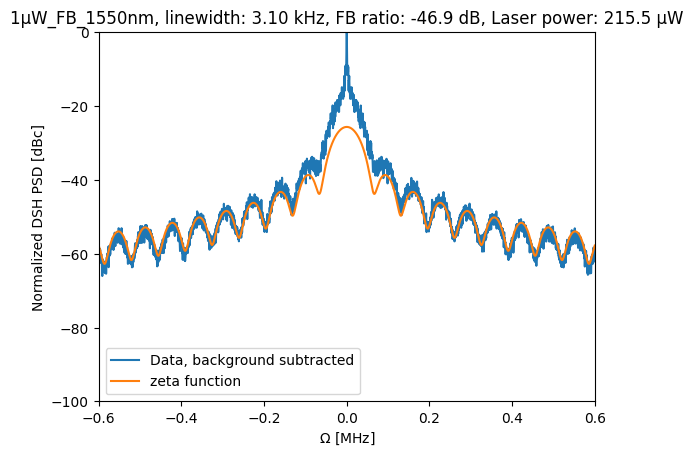

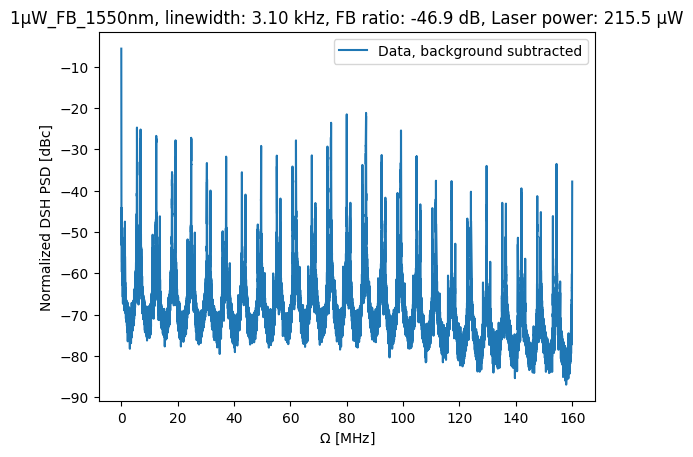

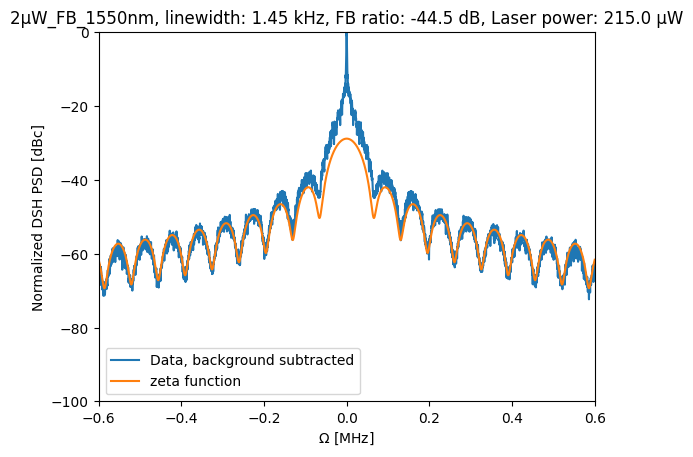

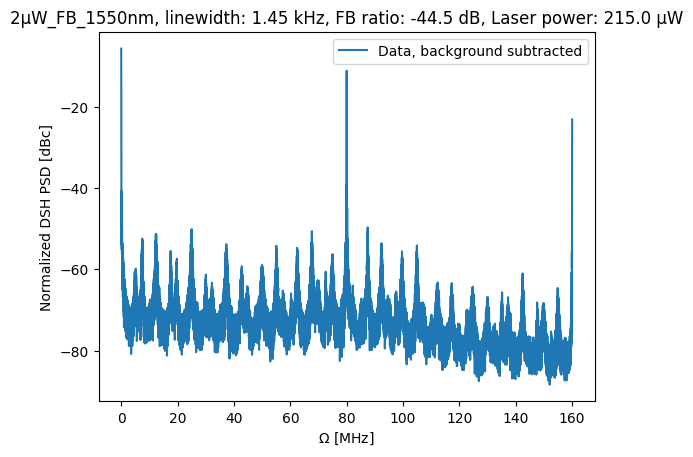

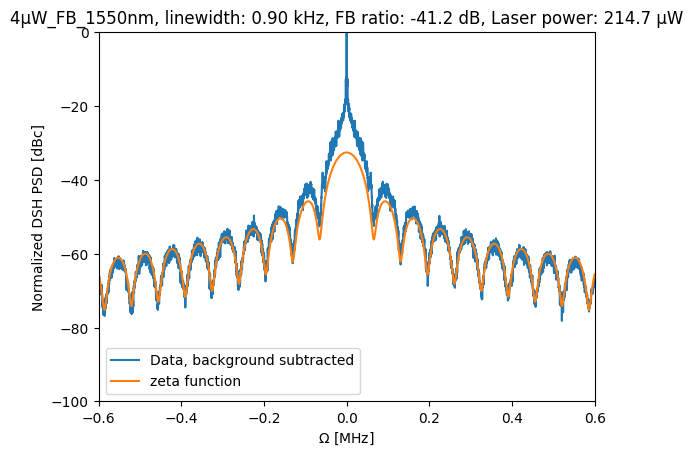

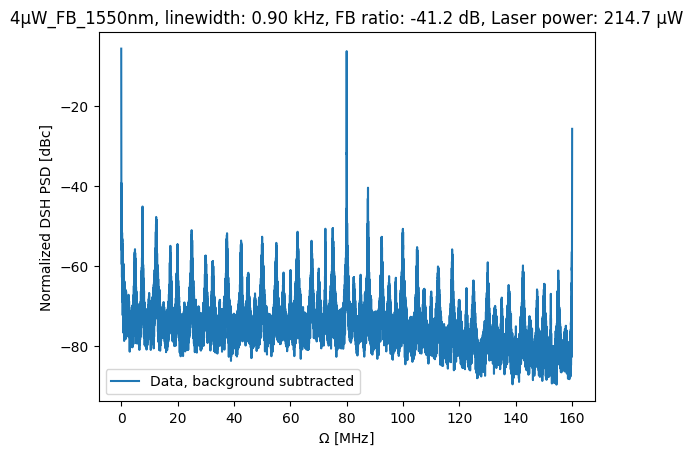

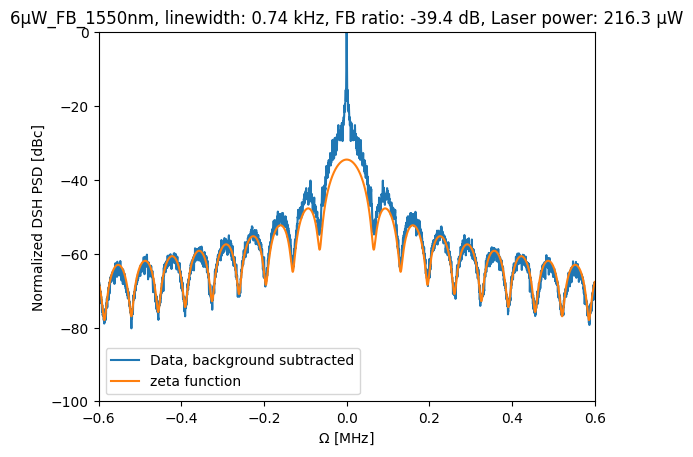

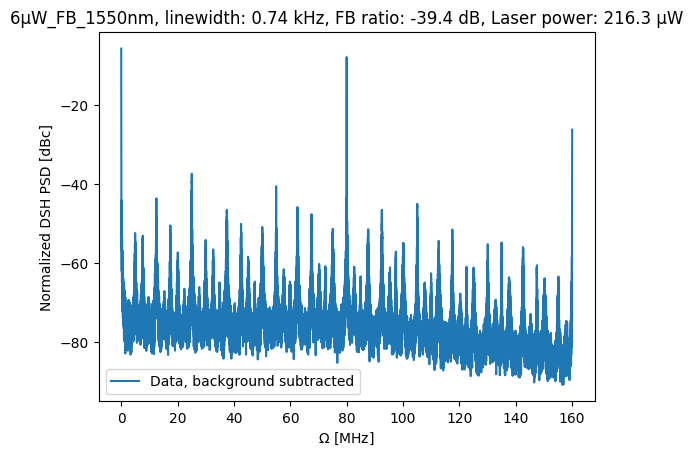

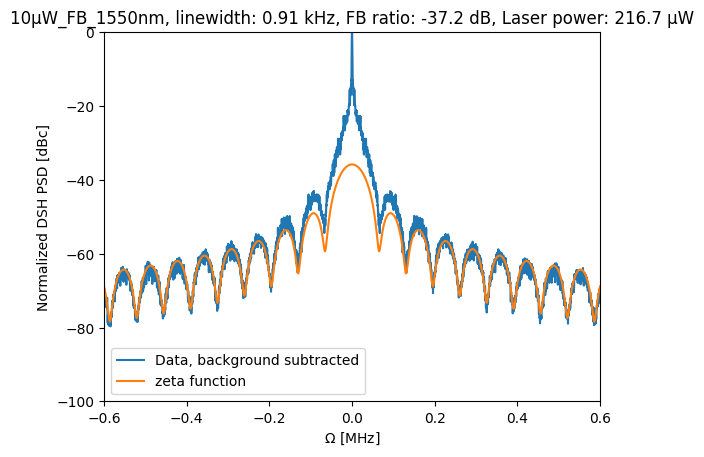

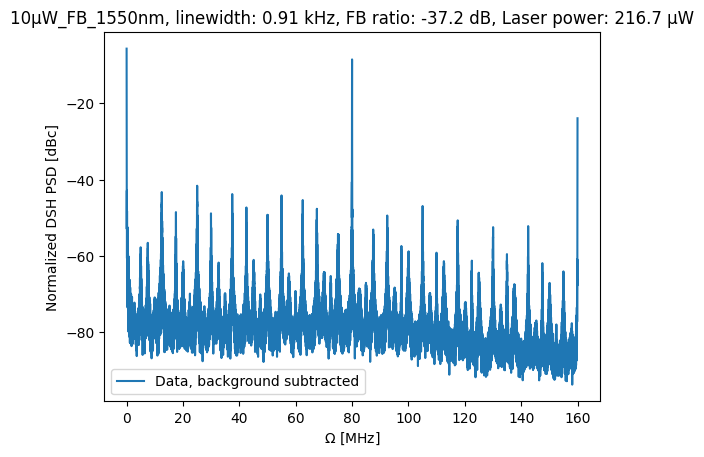

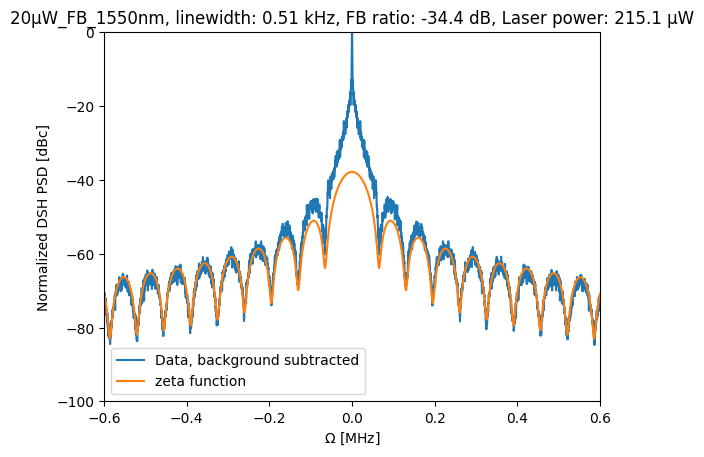

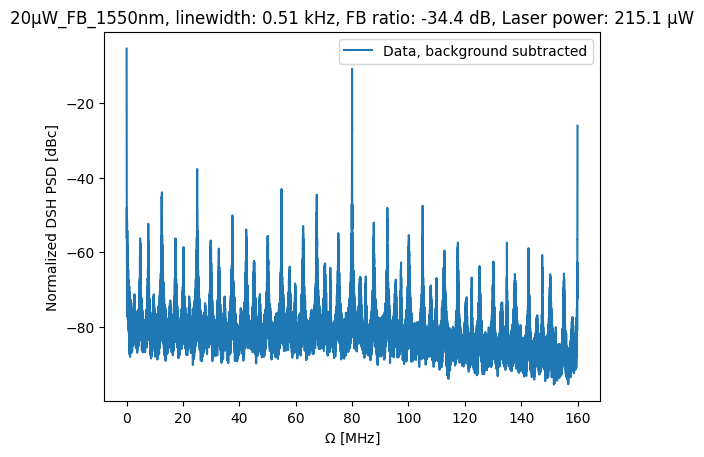

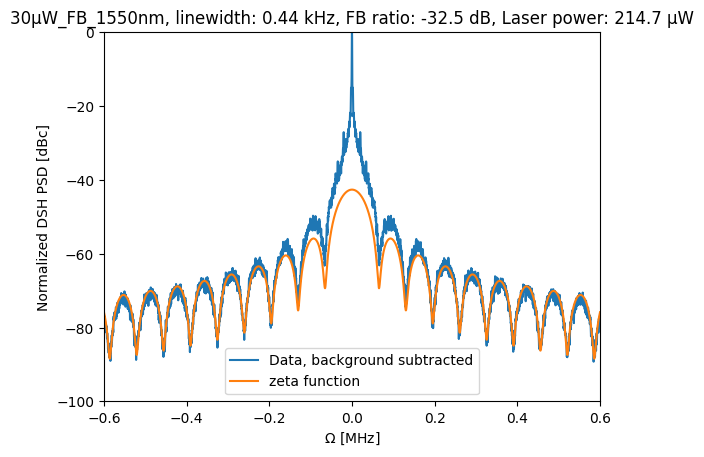

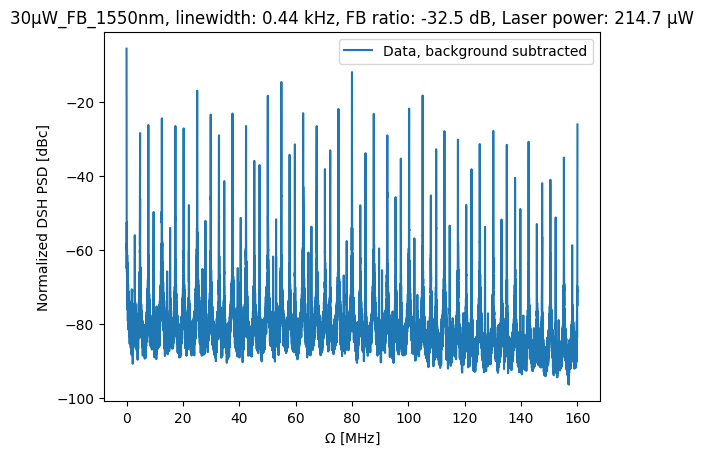

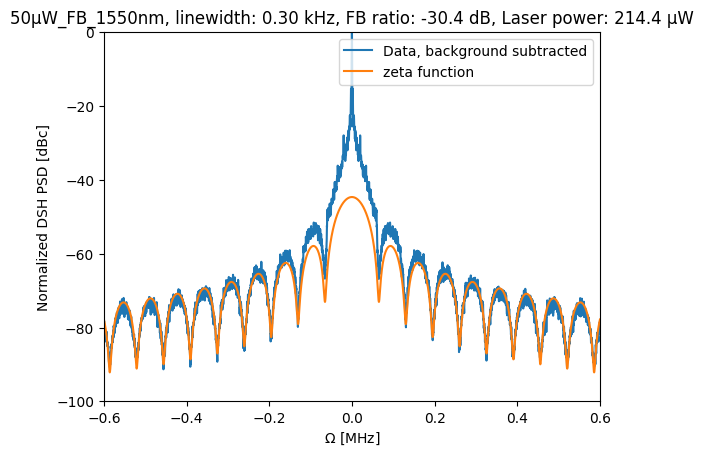

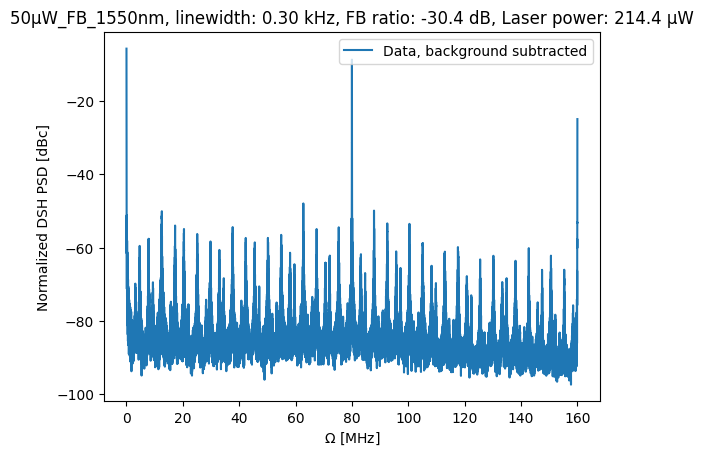

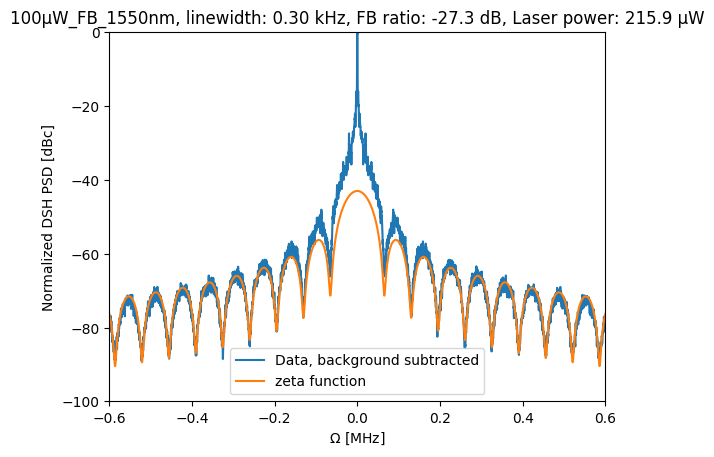

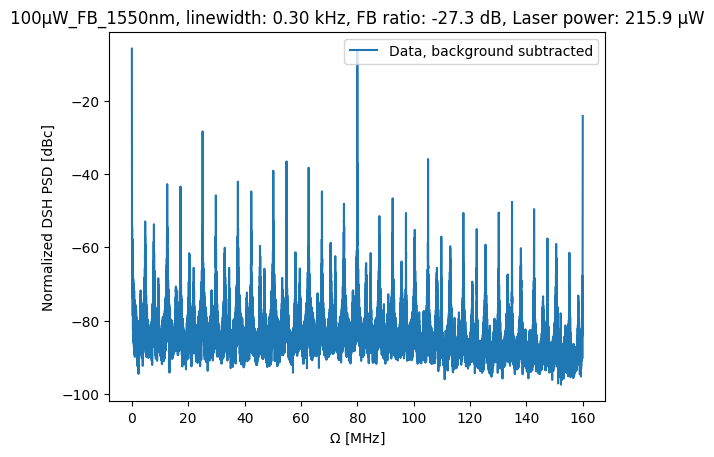

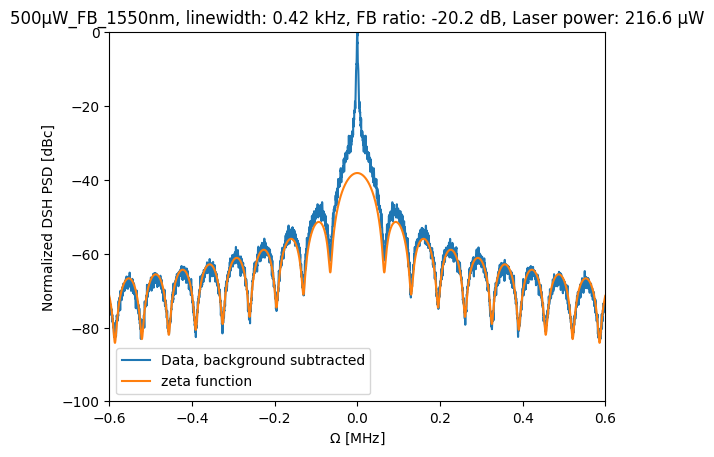

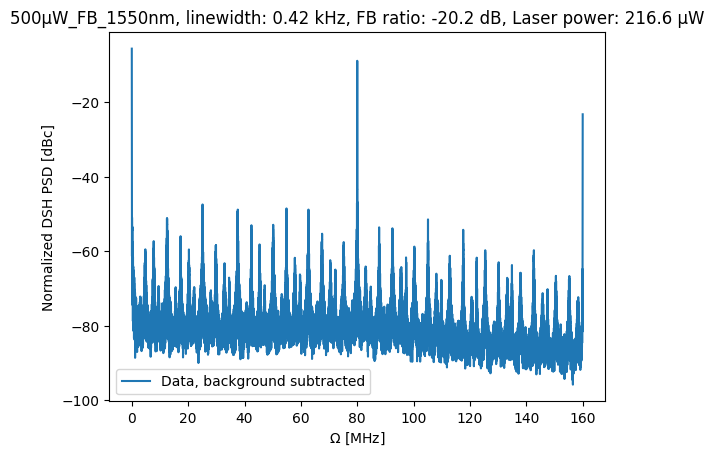

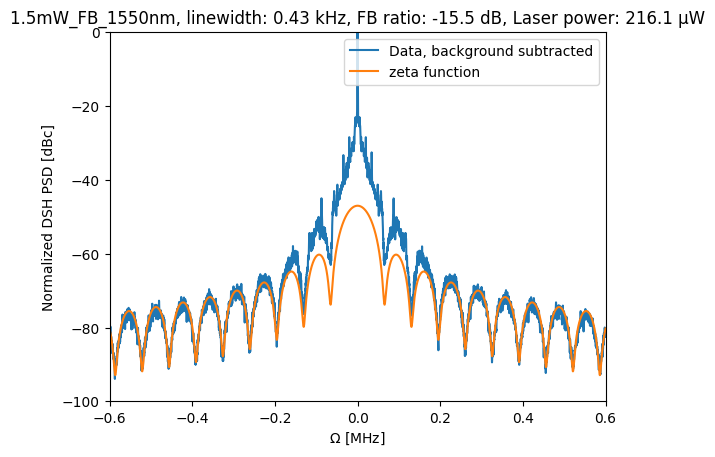

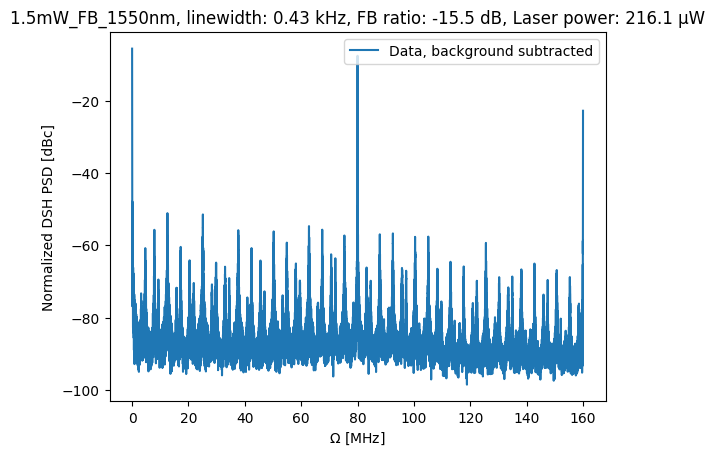

In [ ]:
#Saving the plots with the lowest linewidths

best_linewidths_1550nm = [[None for _ in range(datasets_no_1550nm)] for _ in range(2)]


for data_index in range(datasets_no_1550nm):

    lowest_linewidth = min([v for v in linewidths_1550nm[data_index] if v != None])

    i = linewidths_1550nm[data_index].index(lowest_linewidth)

    fs = measurements_1550nm[data_index][i][0]
    ps = measurements_1550nm[data_index][i][1] - max(measurements_1550nm[data_index][i][1])

    filter = (abs(fs) > 0.2) & (abs(fs) < 0.4)

    params, whatevs = curve_fit(ff.zeta_fit,fs[filter]*10**6,ps[filter],p0=[3*10**3,25,3140])

    print(f'Linewidth: {params[0]}, offset: {params[1]}, delay length: {params[2]}')


    linewidths_1550nm[data_index][i] = params[0]
    #linewidth_lor.append(params[0])


    laser_power = laser_powers_1550nm[data_index][i]
    feedback_power = feedback_powers_1550nm[data_index][i]

    feedback_ratio = feedback_ratios_1550nm[data_index][i]

    best_linewidths_1550nm[0][data_index] = feedback_ratio
    best_linewidths_1550nm[1][data_index] = lowest_linewidth


    plt.figure()
    plt.plot(fs,ps, label = 'Data, background subtracted')
    plt.plot(fs,ff.zeta_fit(fs*10**6,params[0],params[1],params[2]), label = 'zeta function')
    plt.title(fr'{data_dirs_1550nm[data_index][105:-23]}, linewidth: {params[0]*1e-3:.2f} kHz, FB ratio: {feedback_ratio:.1f} dB, Laser power: {laser_power*1e6:.1f} µW')
    plt.legend()

    plt.xlim([-.6,.6])
    plt.ylim([-100,0])

    plt.xlabel(r'$\Omega$ [MHz]')
    plt.ylabel(r'Normalized DSH PSD [dBc]')

    try:
        if data_index == 0:
            os.mkdir(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm')
    except:
        pass
    
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm\{data_dirs_1550nm[data_index][96:]}_ESA_spectrum_zeta_fit_low_linewidth_best.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm\{data_dirs_1550nm[data_index][96:]}_ESA_spectrum_zeta_fit_low_linewidth_best.png')



    fs_full = dirs_1550nm[data_index][0][i].freqs 
    ps_full = dirs_1550nm[data_index][0][i].powers

    plt.figure()
    plt.plot(fs_full,ps_full, label = 'Data, background subtracted')
    #plt.plot(fs_full,ff.zeta_fit(fs*10**6,params[0],params[1],params[2]), label = 'zeta function')
    plt.title(fr'{data_dirs_1550nm[data_index][105:-23]}, linewidth: {params[0]*1e-3:.2f} kHz, FB ratio: {feedback_ratio:.1f} dB, Laser power: {laser_power*1e6:.1f} µW')
    plt.legend()

    #plt.xlim([-.6,.6])
    #plt.ylim([-80,0])

    plt.xlabel(r'$\Omega$ [MHz]')
    plt.ylabel(r'Normalized DSH PSD [dBc]')
    

    try:
        if data_index == 0:
            os.mkdir(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm')
    except:
        pass
    
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm\{data_dirs_1550nm[data_index][96:]}_ESA_full_spectrum_low_linewidth_best.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm\{data_dirs_1550nm[data_index][96:]}_ESA_full_spectrum_low_linewidth_best.png')


    plt.figure()
    plt.plot(start_times_1550nm[data_index],linewidths_1550nm[data_index])
    plt.title('linewidth over time')
    plt.xlabel('time [s]')
    plt.ylabel('Linewidths [Hz]')
    plt.yscale('log')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm\{data_dirs_1550nm[data_index][96:]}_linewidths_vs_time.pdf')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_1550nm\{data_dirs_1550nm[data_index][96:]}_linewidths_vs_time.png')


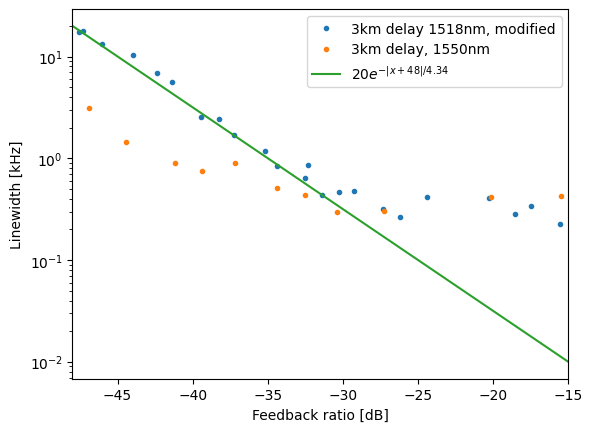

In [ ]:
x = np.linspace(-48,-15,1000)

plt.figure()

best_linewidths_mod = [[],[]]

best_linewidths_mod[0]  = list(np.delete(best_linewidths[0][:30],[1,2,15,17,19,20,24])) #Removing points which where remeasured due to bad polarization
best_linewidths_mod[1] = list(np.delete(best_linewidths[1][:30],[1,2,15,17,19,20,24])) #Removing points which where remeasured due to bad polarization

#plt.plot(best_linewidths[0],10*np.log10(np.array(best_linewidths[1])),'.')
#plt.plot(best_linewidths[0],np.array(best_linewidths[1])*1e-3,'.', label='3km delay')
plt.plot(best_linewidths_mod[0],np.array(best_linewidths_mod[1])*1e-3,'.', label='3km delay 1518nm, modified')
#plt.plot(best_linewidths_1km[0],np.array(best_linewidths_1km[1])*1e-3,'.', label='1km delay')
plt.plot(best_linewidths_1550nm[0],np.array(best_linewidths_1550nm[1])*1e-3,'.', label='3km delay, 1550nm')
plt.plot(best_linewidths[0][30:],np.array(best_linewidths[1][30:])*1e-3, '.', label = '3km delay, 1518nm auto meas')


#plt.plot(x,0.85*abs(x)+3)
#plt.plot(x,abs(x)-4.3)
plt.plot(x,20*np.exp(-abs(x+48)/4.34), label = '$20 e^{-|x+48|/4.34}$')
plt.yscale('log')
plt.ylabel('Linewidth [kHz]')
plt.xlabel('Feedback ratio [dB]')
plt.xlim([-48,-15])
plt.legend()

plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_linewidth_vs_FB_1550nm,1518nm.pdf')
plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_linewidth_vs_FB_1550nm,1518nm.png')

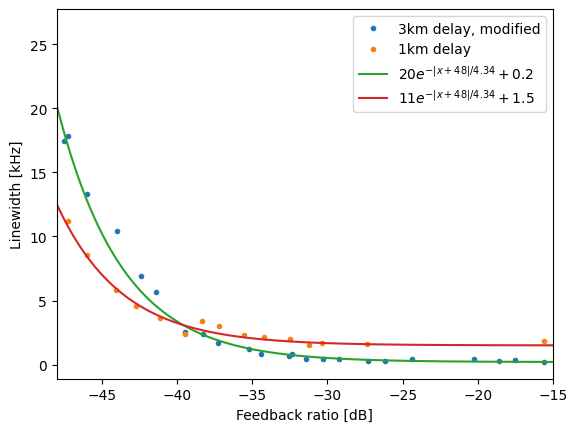

In [ ]:
x = np.linspace(-50,-15,1000)

plt.figure()

#plt.plot(best_linewidths[0],10*np.log10(np.array(best_linewidths[1])),'.',label = '3km delay')
#plt.plot(best_linewidths_1km[0],10*np.log10(np.array(best_linewidths_1km[1])),'.', label='1km delay')
plt.plot(best_linewidths_mod[0],np.array(best_linewidths_mod[1])*1e-3,'.',label='3km delay, modified')
plt.plot(best_linewidths_1km[0],np.array(best_linewidths_1km[1])*1e-3,'.', label='1km delay')


#plt.plot(x,0.85*abs(x)+3)
#plt.plot(x,abs(x)-4.3)
#plt.plot(x,10**(abs(x)/10-3.5), label = '$10^{|x|/10-3.5}$')
plt.plot(x,20*np.exp(-abs(x+48)/4.34)+0.2, label = '$20 e^{-|x+48|/4.34}+0.2$')
plt.plot(x,11*np.exp(-abs(x+48)/4.34)+1.5, label = '$11 e^{-|x+48|/4.34}+1.5$')



#plt.plot(x,np.exp(abs(x)/10-10))
#plt.yscale('log')
plt.ylabel('Linewidth [kHz]')
plt.xlabel('Feedback ratio [dB]')
plt.xlim([-48,-15])
plt.legend()
plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_linewidth_vs_FB_1km,3km.pdf')
plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Analyzed_{date.today()}_linewidth_vs_FB_1km,3km.png')

In [ ]:
dirs_1km[3][3][0]['laser_power']

[0.000213154664,
 0.000213096981,
 0.000213168401,
 0.000213465522,
 0.000213808686,
 0.000214082655,
 0.000214214553,
 0.00021434114,
 0.000214369327,
 0.000214381449,
 0.000214410247,
 0.000214496671,
 0.000214633037,
 0.000214754065,
 0.000214782034,
 0.000214794432,
 0.000214666099,
 0.000214551619,
 0.000214457483,
 0.000214384505,
 0.00021428708,
 0.000214218526]

In [ ]:
def R_squared(data,fitfunc_evaluated): #Goodness of fit
    
    return (((data-fitfunc_evaluated))**2).sum()/len(data) #/ ((data-data.mean())**2).sum()

In [ ]:
xs  = np.arange(-70,-40,0.1)
x_zeta = np.arange(-38,-15,0.1)

def fitfunc(xs,a,b):
    
    return a*xs+b

In [ ]:
params_zeta = [[] for _ in range(datasets_no)]
for i in range(datasets_no):
        
    plt.figure()
    param_zeta, whatevs_zeta = curve_fit(fitfunc,np.array(feedback_ratios[i])[range_of_zeta[i]],10*np.log10(np.array(linewidths[i])[range_of_zeta[i]]))

    params_zeta[i] = param_zeta

    plt.plot(np.array(feedback_ratios[i])[range_of_zeta[i]],10*np.log10(np.array(linewidths[i])[range_of_zeta[i]]),'.')
    #plt.plot(xs,fitfunc(xs,params_lin[0],params_lin[1]))

    #plt.plot(feedback_ratios_zeta,10*np.log10(np.array(linewidth_zeta)),'.')
    plt.plot(x_zeta,fitfunc(x_zeta,params_zeta[i][0]-0.3,params_zeta[i][1]-7))

    plt.title(f'Linear fit, {data_dirs[i][96:]}, fitted slope - 0.3: {params_zeta[i][0] - 0.3:.2f}')
    plt.xlabel('Feedback ratio [dB]')
    plt.ylabel('Linewidth [dB]?')

    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Linewidth vs feedback ratio lin fit {data_dirs[i][96:]}.png')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Linewidth vs feedback ratio lin fit {data_dirs[i][96:]}.pdf')

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

<Figure size 640x480 with 0 Axes>

[[28115.316568304534,
  18954.91295209122,
  16788.268510570648,
  21970.624413076945,
  22461.52266630439,
  23317.493059508844,
  23282.97097974351,
  23713.85176426094,
  18760.371543990896,
  18145.840401990416,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  11212.314471314414,
  12028.648263999217,
  6841.185881741495,
  7123.629906900336,
  8767.779116071826,
  10789.685863400377,
  8515.446061239032,
  6279.905326828522,
  9550.635513554262,
  10355.856223067014],
 [979.9819060766916,
  1504.4177692694795,
  3390.859426426437,
  3782.2855343989563,
  6421.508434486851,
  2307.3919179475365,
  913.8171137337557,
  5260.199530469154,
  4666.240891883509,
  9832.550008323544,
  1202.2354652425015,
  3260.3172955563114,
  1626.3566900102119,
  6390.814033368953,
  1410.242973169164,
  1159.661378323656,
  1066.9043628021507,
  4559.1521266622085,
  1296.9962789336853,


In [ ]:

plt.figure()

for data_index in range(datasets_no):


    if data_index == 1:
        plt.plot(feedback_ratios[data_index], linewidths[data_index], '.', label = f'Gaussian, zeta fit, {data_dirs[data_index][96:]}, log avg')
        #plt.plot(feedback_ratios,np.array(linewidth_lor),'.', label = 'Lorentzian fit')

    else: 
        plt.plot(feedback_ratios[data_index], linewidths[data_index], '.', label = f'Gaussian, zeta fit, {data_dirs[data_index][96:]}')
        #plt.plot(np.array(feedback_ratios[data_index])[range_of_incoherent[data_index]], linewidth_gauss[data_index], '.', label = f'Gaussian fit, {data_dirs[data_index][96:]}')
        #plt.plot(feedback_ratios,np.array(linewidth_lor),'.', label = 'Lorentzian fit')
        #plt.plot(np.array(feedback_ratios[data_index])[range_of_zeta[data_index]], linewidth_zeta[data_index],'.', label = f'Zeta fit, {data_dirs[data_index][96:]}')

    plt.title('Feedback ratio vs linewidth')
    plt.xlabel('Feedback ratio [dB]')
    plt.ylabel('Linewidth [Hz]')
    #plt.plot(xs,np.exp(fitfunc(xs,params_lin[0]))
    plt.ylim([4*10**2,10**7])
    plt.yscale('log')

    plt.legend(loc='lower left')
    plt.xlim([-71,-15])
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Linewidth vs feedback ratio.png')
    plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Linewidth vs feedback ratio.pdf')

<Figure size 640x480 with 0 Axes>

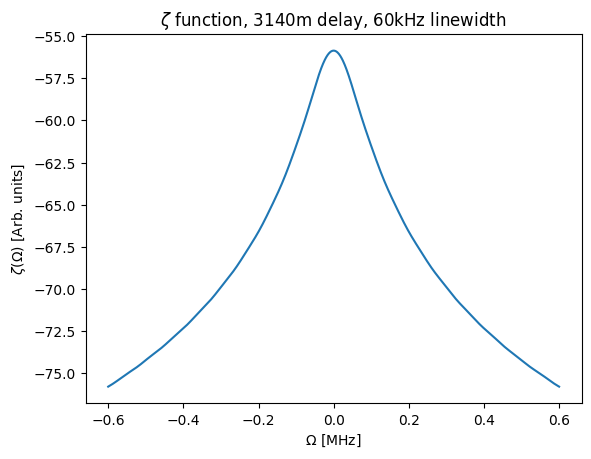

In [ ]:
plt.plot(np.linspace(-0.6*10**6,0.6*10**6,10**3)*10**(-6), ff.zeta_fit(np.linspace(-0.6*10**6,0.6*10**6,10**3),6*10**4,0,3140))


plt.title(r'$\zeta$ function, 3140m delay, 60kHz linewidth')
plt.xlabel(r'$\Omega$ [MHz]')
plt.ylabel(r'$\zeta(\Omega)$ [Arb. units]')
#plt.plot(xs,np.exp(fitfunc(xs,params_lin[0]))
#plt.ylim([4*10**2,10**7])

#plt.legend(loc='lower left')
#plt.xlim([-71,-15])
plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Zeta_func_60kHz_linewidth.png')
plt.savefig(fr'.\Measurement spectra and plots\Linewidths\Zeta_func_60kHz_linewidth.pdf')

In [ ]:
for i in range(20):

    if i==12:
        break
    print(i)


print('whatevs')

0
1
2
3
4
5
6
7
8
9
10
11
whatevs


In [ ]:
import os


In [ ]:
path_aux = os.path.join(os.getcwd(),'meas')

In [ ]:
path_aux

'c:\\Users\\au617810\\OneDrive - Aarhus universitet\\Videnskabelig assistent\\meas'

In [ ]:
a = [[1,5],[2,6],[4,5]]
b = [[1,2],[26,27],[6,7]]

np.savetxt('gg.txt',a,fmt='%s')

In [ ]:
print(f'The largest difference in feedback ratio calculation is {max(abs(10*np.log10(np.divide(np.array(feedback_powers),np.array(laser_powers)*40))-np.array(feedback_ratios))):.2f} dB')

ValueError: max() iterable argument is empty

In [ ]:
freq = np.linspace(-10**6,10**6,10**7)


plt.plot(freq, ff.zeta_fit(freq,1*10**4,0,500))

In [ ]:
test = np.array([5,4])
print(test**2)